# Modified IQAE tests

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np

from random import sample, seed
from collections import defaultdict

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile, assemble
from qiskit.algorithms import amplitude_estimators, EstimationProblem
from qiskit.algorithms import IterativeAmplitudeEstimation as BaseIterativeAmplitudeEstimation

from algorithms import IterativeAmplitudeEstimation, ModifiedIterativeAmplitudeEstimation
from algorithms import NoQuantumIterativeAmplitudeEstimation
from operators import *

In [2]:
# for setting a single amplitude, below automates this for arbirtrary numbers of amplitudes
n = 4
N = 2**n
k = N//2
marked = sample(range(N), k)

In [3]:
# Define the estimation problem and oracle function
def make_problems(n, marked):
    
    def good_state(state):
        bin_marked = [(n-len(bin(s))+2)*'0'+bin(s)[2:] for s in marked]
        return (state in bin_marked)

    problem = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )

    problem2 = EstimationProblem(
        state_preparation=A(n),  # A operator
        grover_operator=Q(n, marked),  # Q operator
        objective_qubits=range(n),
        is_good_state=good_state  # the "good" state Psi1 is identified as measuring |1> in qubit 0
    )
    
    return problem, problem2

In [4]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 100

## Compare Modified IQAE to No-Quantum IQAE

In [5]:
# parameters for IQAE

# amplitudes
n = 4
k = 2**n

# epsilons
powers = range(2,7)
epsilons = [(1.0 / (10**power)) for power in powers]

# other
alpha = 0.05
confint_method = 'beta'
verbose = False

In [6]:
def process_state(state, verbose=False):
    if verbose:
        for k,v in state.items():
            print(k)
            print(v)
    if len(state) == 0: return [],[],[]
    round_shots = state['round_shots']
    queries = state['n_queries']
    removed = False

    if 0 in round_shots:
        shots_at_k0 = round_shots.pop(0)
        removed = True
    if 0 in queries:
        queries_at_k0 = queries.pop(0)

    k_i = [k for k in round_shots]
    queries_i = [queries[k] for k in k_i]
    shots_i = ([shots_at_k0] if removed else []) + [round_shots[k] for k in k_i]

    if removed:
        k_i.insert(0, 0.1)

    return shots_i, queries_i, k_i

a: 0/16 = 0.0
Modified IAE estimations: [8.98387435672124e-05, 6.757692238554163e-07, 7.3405394848194075e-09, 6.123570177892582e-11, 4.3780536875591434e-13]
Original IAE estimations: [4.5459085893367654e-05, 1.9947285420675235e-06, 4.923525110072622e-09, 6.235463877894556e-11, 5.911852271772893e-13]
Modified IAE total queries: 66463100
Original IAE total queries: 139982800
Modified IAE epsilons (CI width): [8.98387435672124e-05, 6.757692238554163e-07, 7.3405394848194075e-09, 6.123570177892582e-11, 4.3780536875591434e-13]
Original IAE epsilons (CI width): [4.5459085893367654e-05, 1.9947285420675235e-06, 4.923525110072622e-09, 6.235463877894556e-11, 5.911852271772893e-13]
a: 0/16 = 0.0
Modified IAE estimations: [3.16895734589248e-05, 9.804477318559795e-08, 8.76744713358474e-09, 2.187845659626375e-11, 5.0175457691539663e-14]
Original IAE estimations: [2.5628904137842065e-05, 7.489547808578291e-07, 5.124256492255293e-10, 1.8064825081217084e-11, 5.441871572958773e-13]
Modified IAE total que

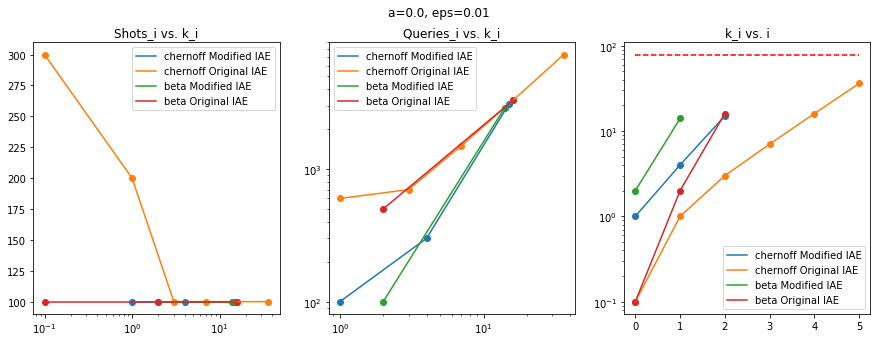

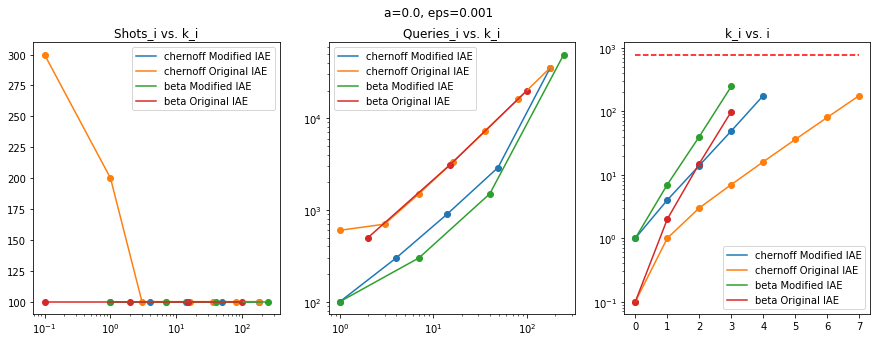

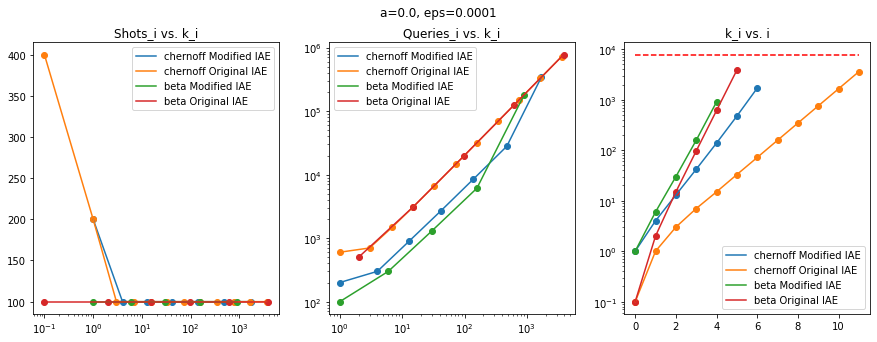

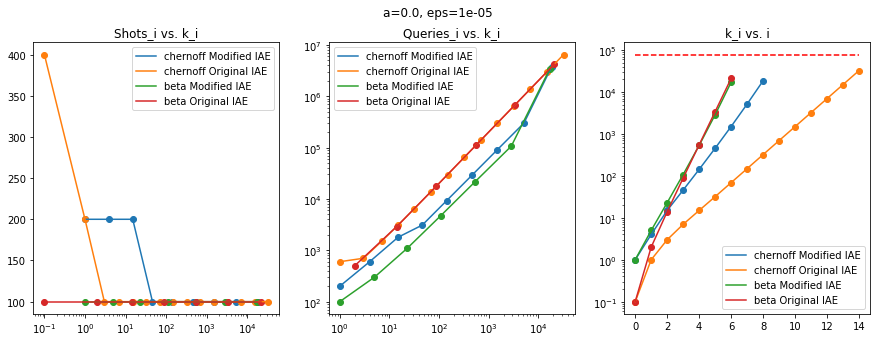

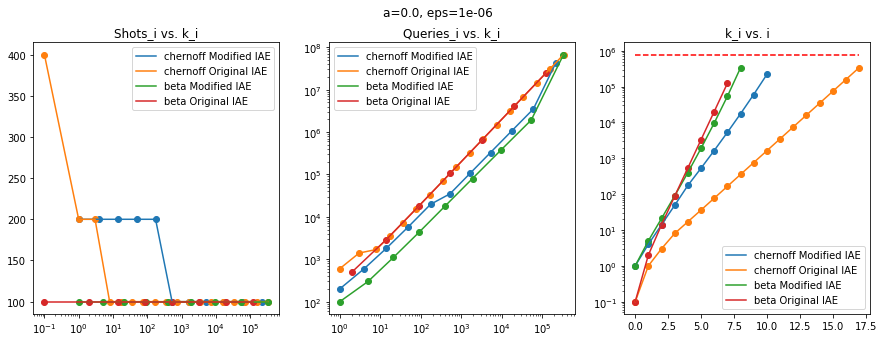

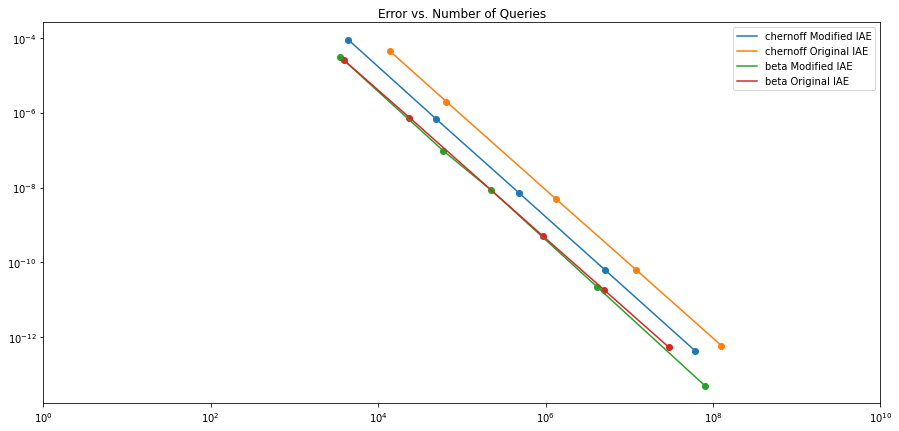

a: 1/16 = 0.0625
Modified IAE estimations: [0.06328415911076843, 0.06251372490898605, 0.062491075479453456, 0.06250039782040884, 0.06250008756295707]
Original IAE estimations: [0.06269428567596239, 0.06254677035152047, 0.06249296380154422, 0.06250001758719939, 0.06250001871209585]
Modified IAE total queries: 43678900
Original IAE total queries: 187394400
Modified IAE epsilons (CI width): [0.0026425945697295117, 0.00020089498994443206, 1.1407996290329486e-05, 1.677360861294247e-06, 4.086561376098752e-07]
Original IAE epsilons (CI width): [0.004451239066720486, 0.00040151180695003133, 4.409591570268476e-05, 3.948923872683363e-06, 4.092166824946897e-07]
a: 1/16 = 0.0625
Modified IAE estimations: [0.06396354219739152, 0.06253185133225889, 0.06250836810638283, 0.06250090348786444, 0.06250001875079417]
Original IAE estimations: [0.06444891159593155, 0.062451785236902674, 0.06249804262023943, 0.06249937320175492, 0.06250000035648752]
Modified IAE total queries: 56712500
Original IAE total que

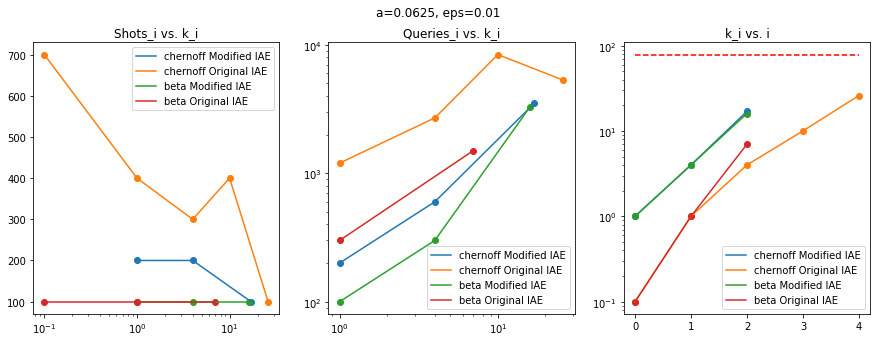

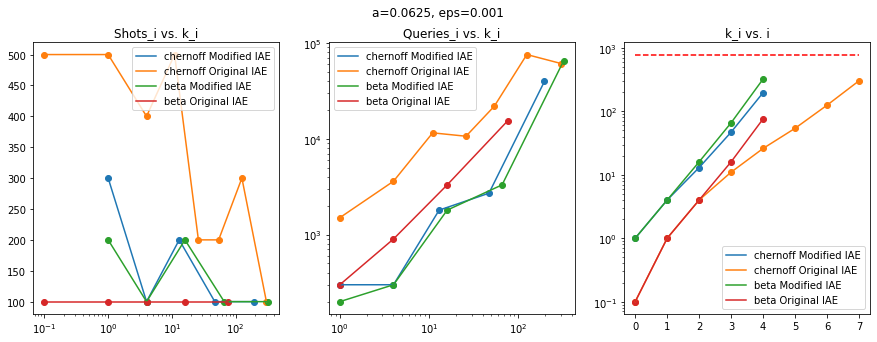

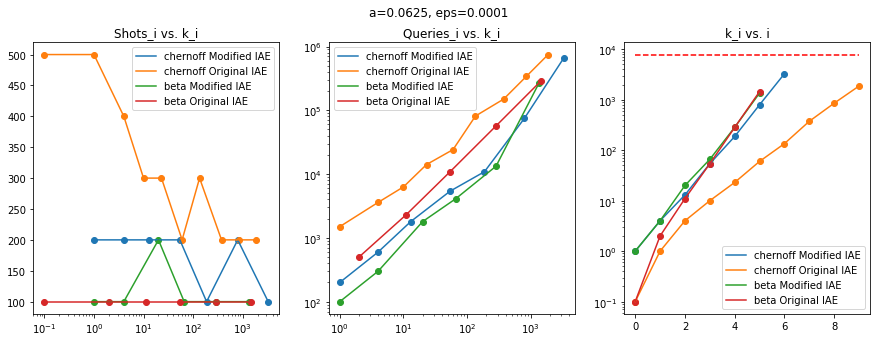

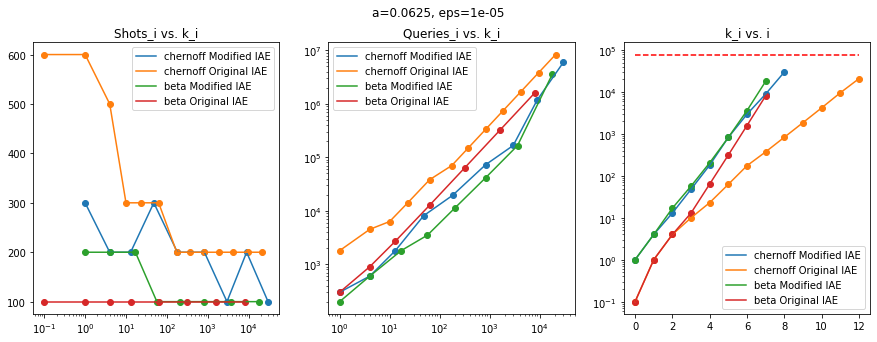

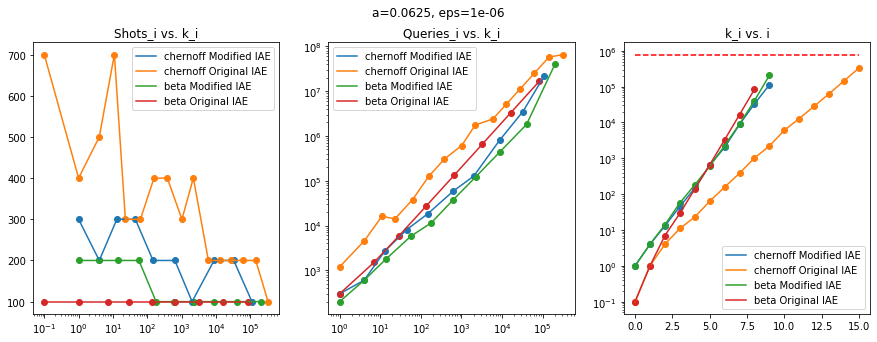

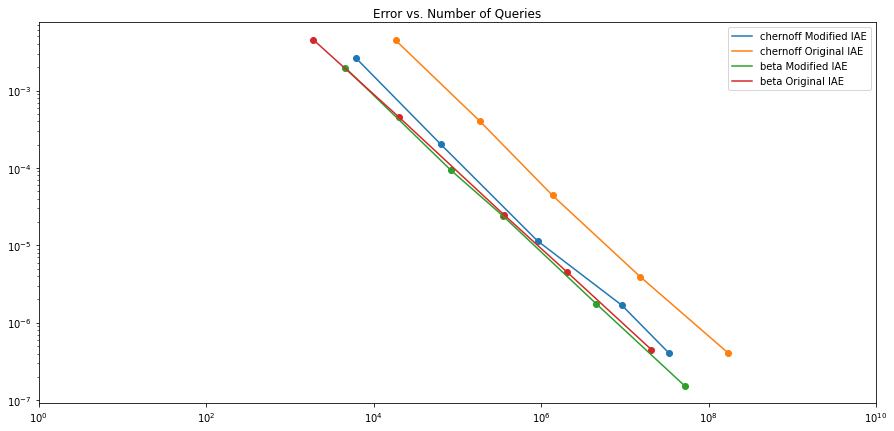

a: 2/16 = 0.125
Modified IAE estimations: [0.12553400802262346, 0.125093287205849, 0.12500602907073194, 0.12499575455147816, 0.12499998299501201]
Original IAE estimations: [0.12504625378806689, 0.12491865890059617, 0.12499017628005335, 0.12499828893203395, 0.12499994646976559]
Modified IAE total queries: 55837500
Original IAE total queries: 205137300
Modified IAE epsilons (CI width): [0.002638616371744555, 0.00027063412885140053, 3.2003553350874736e-05, 5.639525145817448e-06, 2.8139488809919566e-07]
Original IAE epsilons (CI width): [0.005550329736028828, 0.0005722202375905427, 4.115557868605152e-05, 6.202890366277525e-06, 5.390041074859742e-07]
a: 2/16 = 0.125
Modified IAE estimations: [0.12560875493638154, 0.12491169938445712, 0.12500060053426884, 0.12499993471354579, 0.12499994683166574]
Original IAE estimations: [0.12471475717707664, 0.12474455796891828, 0.12498278671596369, 0.12499767579460587, 0.1250000478057805]
Modified IAE total queries: 26826000
Original IAE total queries: 68

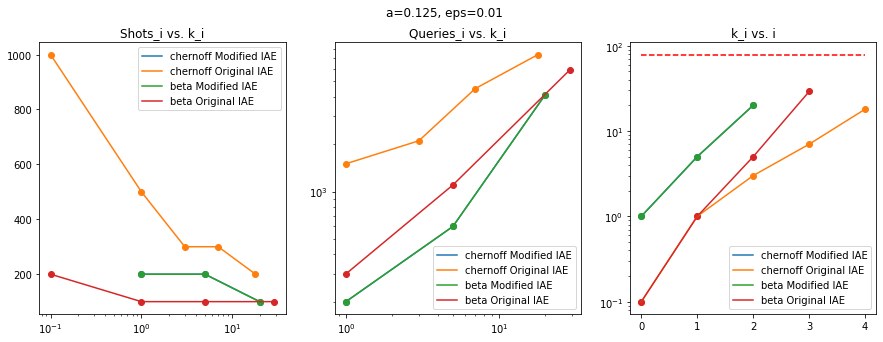

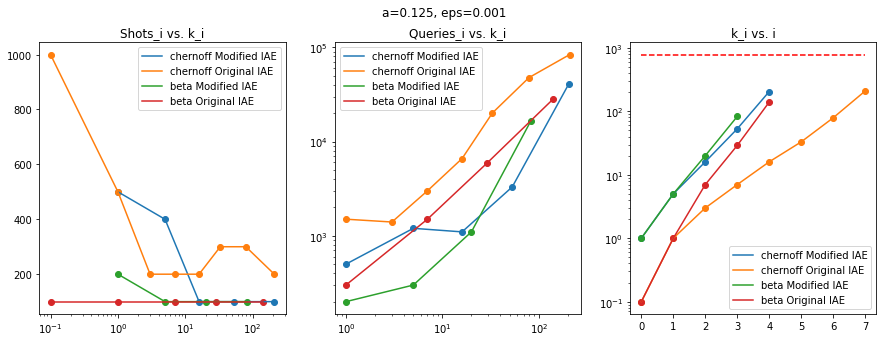

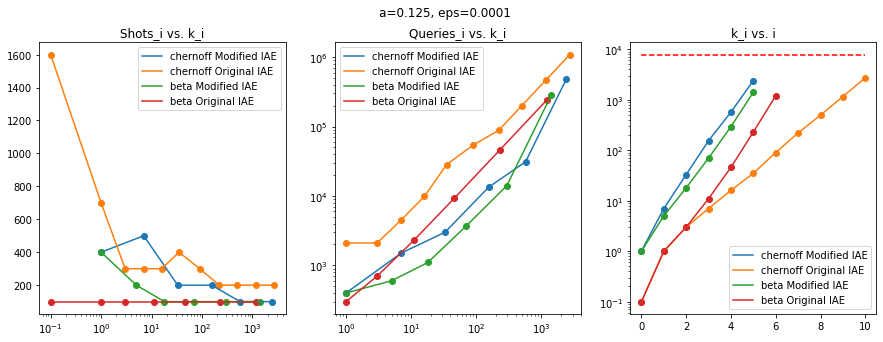

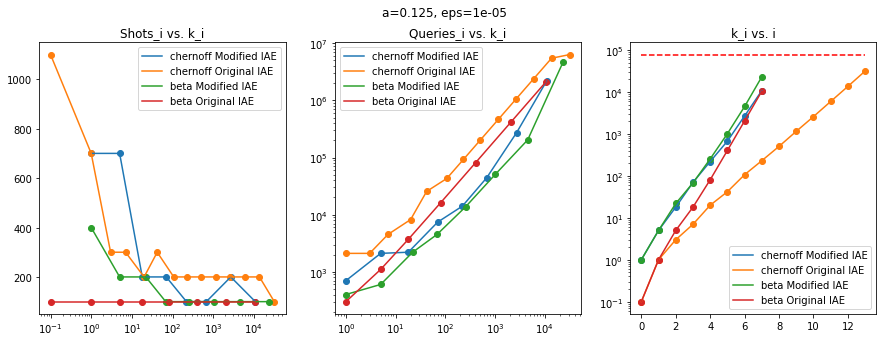

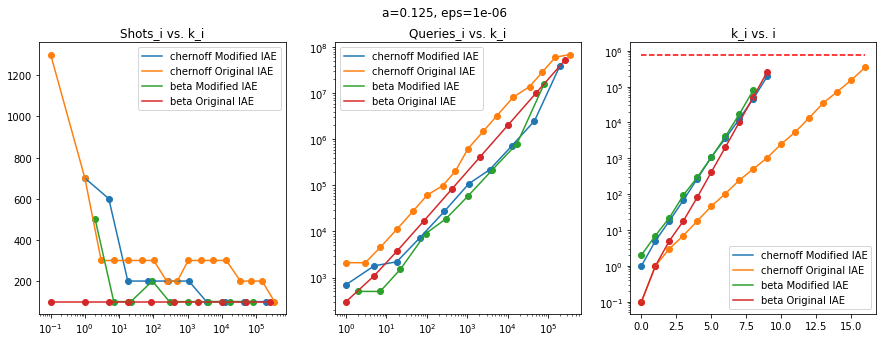

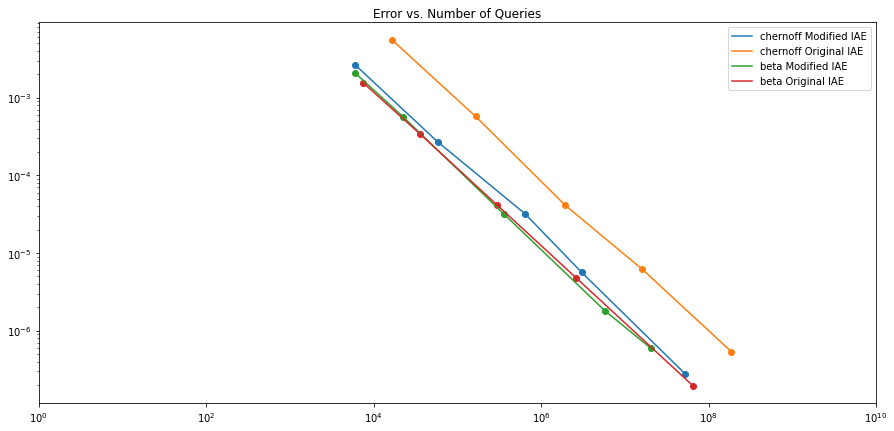

a: 3/16 = 0.1875
Modified IAE estimations: [0.1877522114681275, 0.1875062728706235, 0.18750081030476368, 0.18750000145536352, 0.18749990845459094]
Original IAE estimations: [0.18859868079891007, 0.18740322133653942, 0.18750148046813764, 0.1874988996739264, 0.1875000523472501]
Modified IAE total queries: 46341200
Original IAE total queries: 164399600
Modified IAE epsilons (CI width): [0.005912767423528115, 0.0005004229975284491, 3.400381470346214e-05, 2.66314888255903e-06, 4.627137205892584e-07]
Original IAE epsilons (CI width): [0.006419509545501342, 0.0006054457504850036, 5.8907885471151666e-05, 5.357297374594672e-06, 6.900985810714966e-07]
a: 3/16 = 0.1875
Modified IAE estimations: [0.18631935264399072, 0.18742085368433548, 0.18749725205075357, 0.18749872453109323, 0.1874996652823261]
Original IAE estimations: [0.18545896555464153, 0.1874415882670303, 0.1875008720205507, 0.18750148583308626, 0.18750026409941511]
Modified IAE total queries: 32358000
Original IAE total queries: 2358780

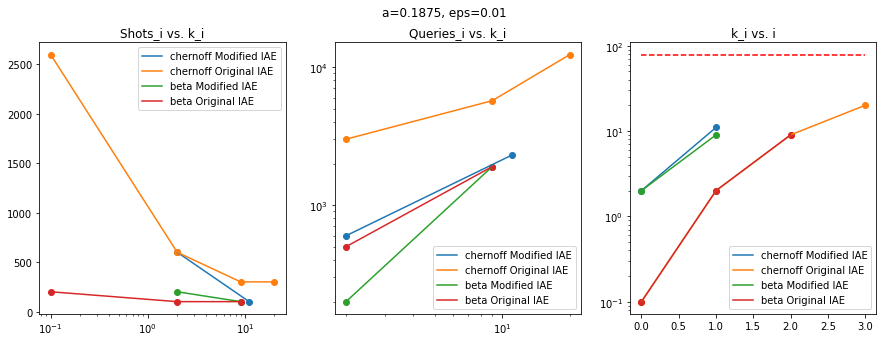

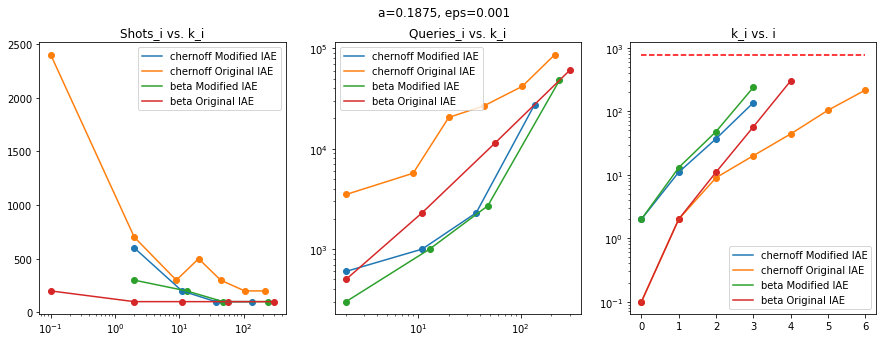

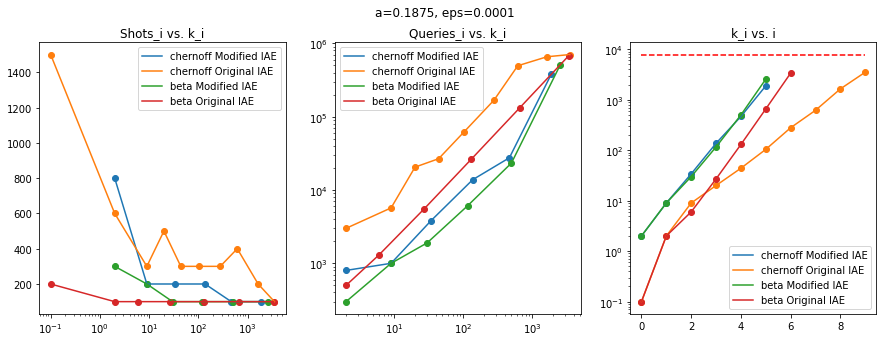

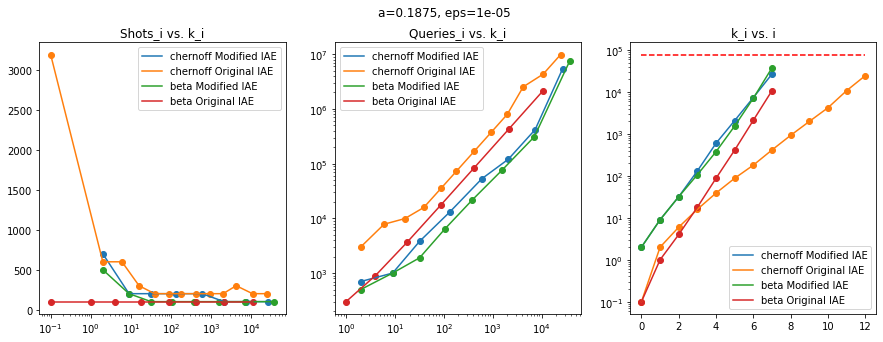

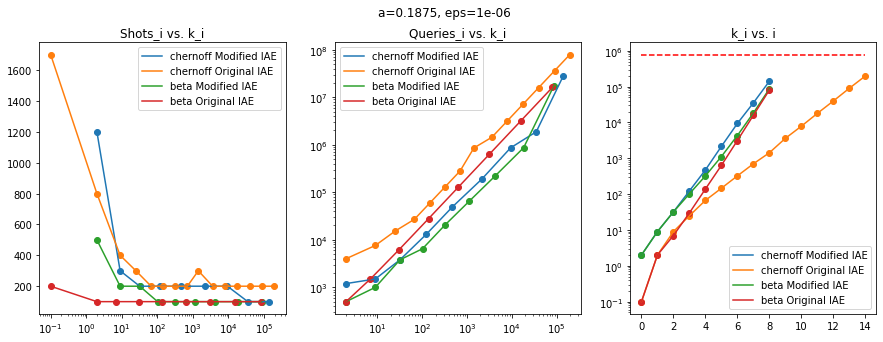

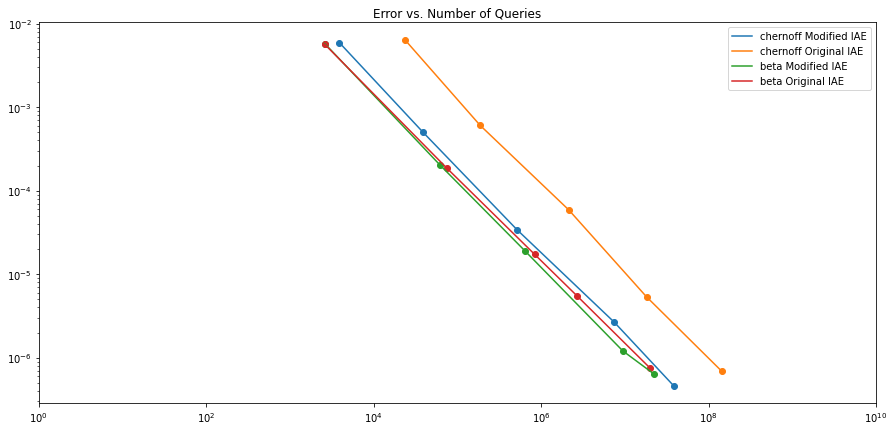

a: 4/16 = 0.25
Modified IAE estimations: [0.249909070676047, 0.25011979910744536, 0.25002346046602963, 0.2500022494761671, 0.24999965328373908]
Original IAE estimations: [0.24948935685320345, 0.25012225927632775, 0.2500060812248367, 0.24555348037133756, 0.2500001705731447]
Modified IAE total queries: 67309000
Original IAE total queries: 240944900
Modified IAE epsilons (CI width): [0.0023174202922099374, 0.0006185710899899166, 5.1264500152969905e-05, 4.913710157219975e-06, 6.32274322301396e-07]
Original IAE epsilons (CI width): [0.006885757608118881, 0.000850190182611052, 6.742007093997471e-05, 7.0419359778778334e-06, 8.518462311368769e-07]
a: 4/16 = 0.25
Modified IAE estimations: [0.25096343718779945, 0.24994891707974934, 0.2500165012635952, 0.25000114673320445, 0.24999986525944745]
Original IAE estimations: [0.24647300853838267, 0.25000944317694634, 0.25000352233743406, 0.24999898191226066, 0.2500000241297762]
Modified IAE total queries: 74214800
Original IAE total queries: 36070600
M

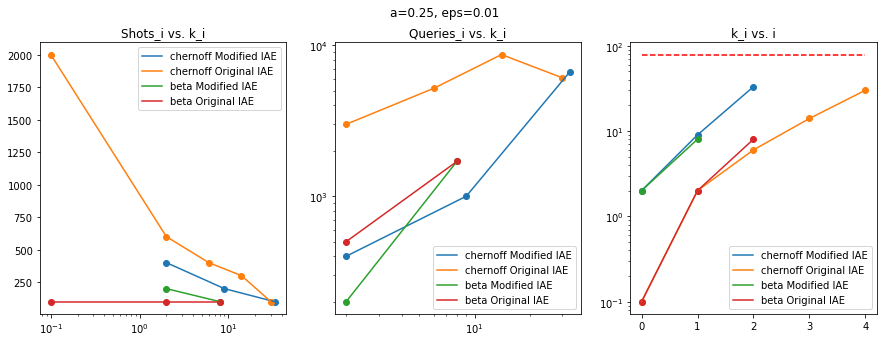

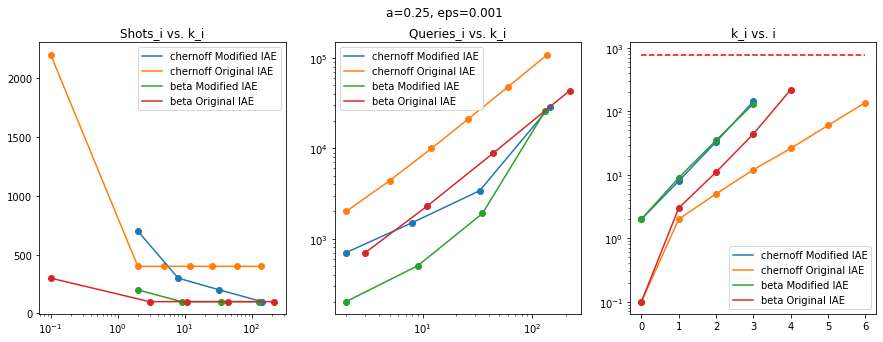

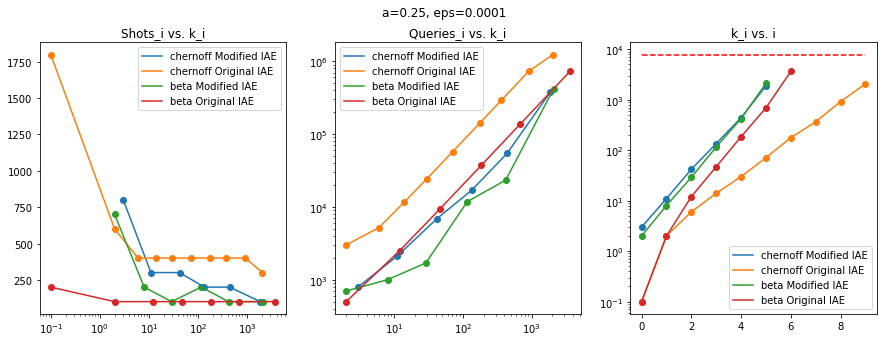

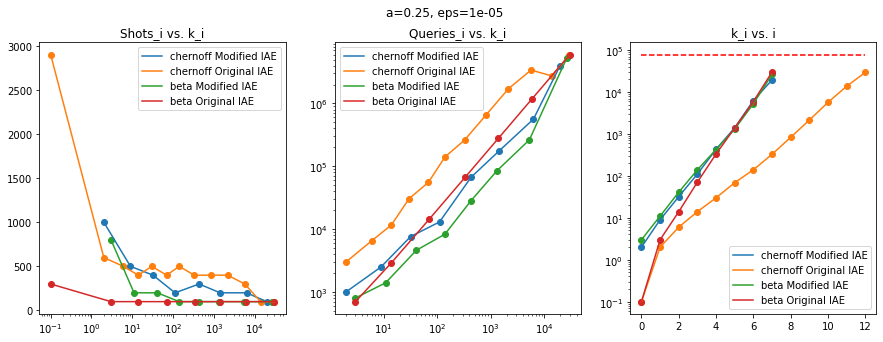

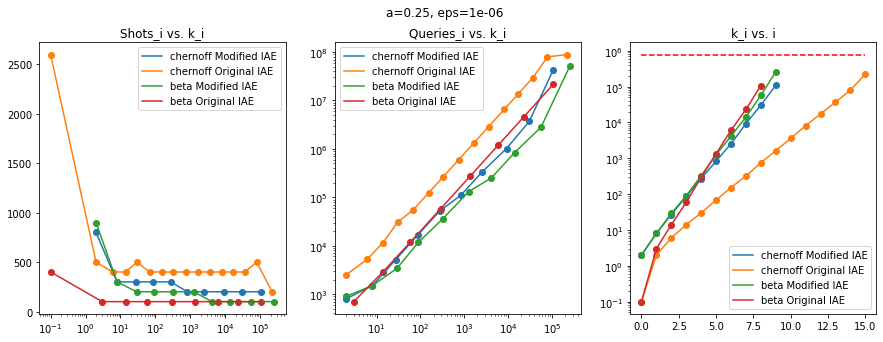

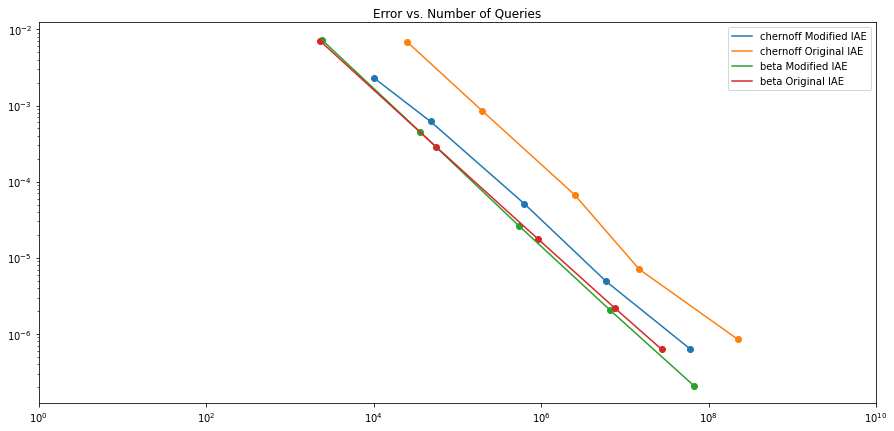

a: 5/16 = 0.3125
Modified IAE estimations: [0.3140533545935237, 0.3123324348820952, 0.31251118176684, 0.31249955871744417, 0.31250014890895567]
Original IAE estimations: [0.3128348238925972, 0.31271256263163766, 0.3125105958112776, 0.31250050139074276, 0.3124999713683675]
Modified IAE total queries: 93532847
Original IAE total queries: 206922700
Modified IAE epsilons (CI width): [0.0036679398045006972, 0.0005782157523165354, 2.9434995650889917e-05, 2.110015734080317e-06, 3.022128788332523e-07]
Original IAE epsilons (CI width): [0.007019107003414432, 0.0007213053699443028, 6.559100235609128e-05, 7.764388779196718e-06, 6.169555284984973e-07]
a: 5/16 = 0.3125
Modified IAE estimations: [0.31421318704145285, 0.31229203155320784, 0.31250438464479197, 0.3124999674396739, 0.31249989805457884]
Original IAE estimations: [0.3106287481849993, 0.31250823950666895, 0.3125220287364828, 0.3124995895014093, 0.3124999401611456]
Modified IAE total queries: 58844300
Original IAE total queries: 71918200
Mo

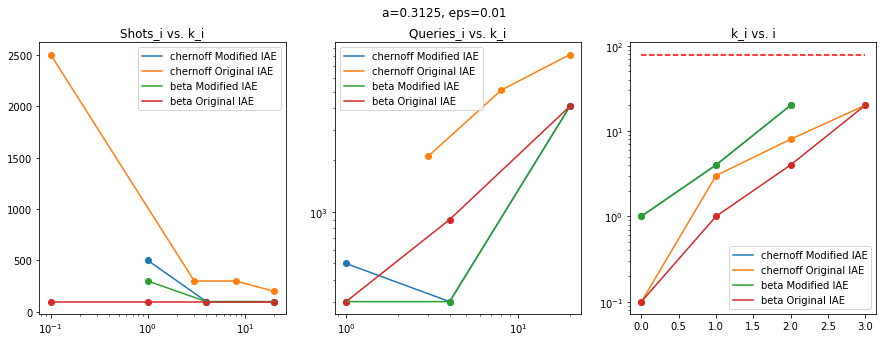

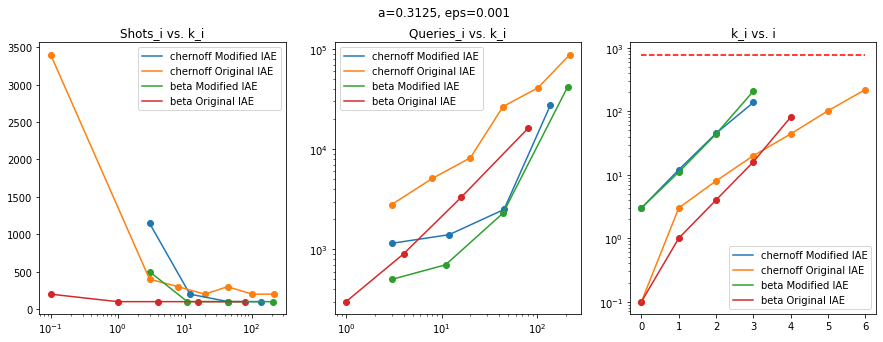

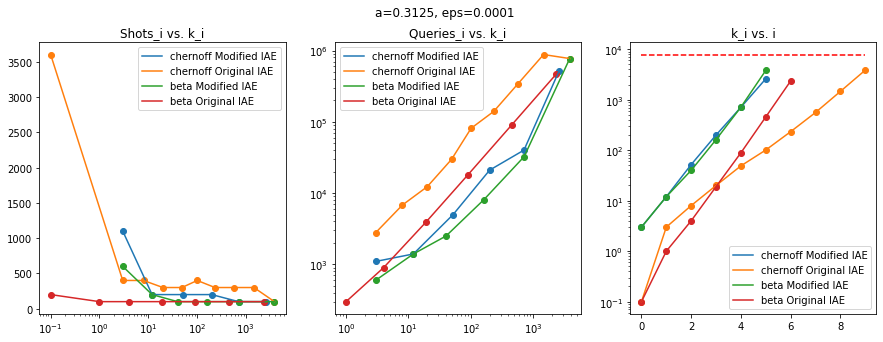

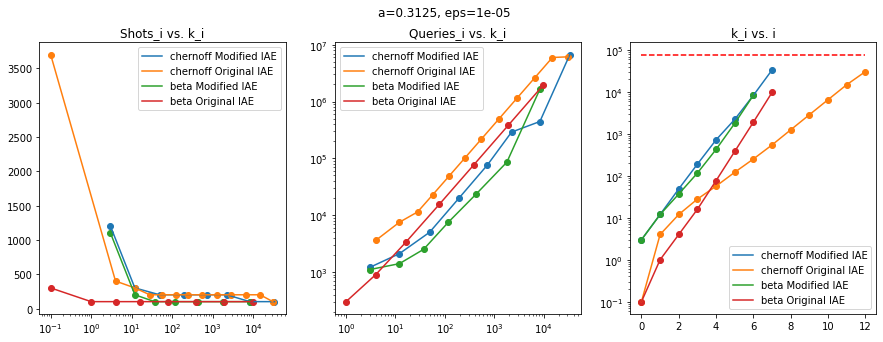

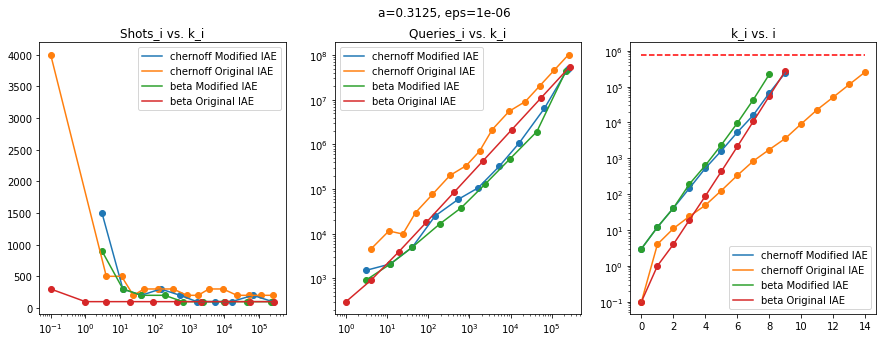

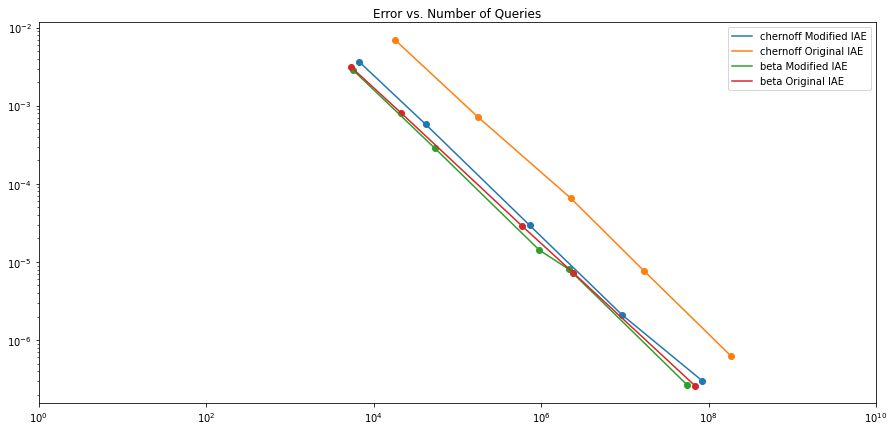

a: 6/16 = 0.375
Modified IAE estimations: [0.3729106051511532, 0.3751169718809567, 0.37496808265563264, 0.3750014215953414, 0.3750001826996354]
Original IAE estimations: [0.3748409995619202, 0.37522900851150914, 0.37500747496078435, 0.37500061142831576, 0.375000095778449]
Modified IAE total queries: 61016900
Original IAE total queries: 207813500
Modified IAE epsilons (CI width): [0.0035117427368284715, 0.0003045781256964808, 8.500518948906244e-05, 6.52696439940037e-06, 4.2330520441669073e-07]
Original IAE epsilons (CI width): [0.008118753860712258, 0.0008670984920408076, 6.43623155060502e-05, 8.511793064519546e-06, 7.882846415618872e-07]
a: 6/16 = 0.375
Modified IAE estimations: [0.3749762308536122, 0.3743253503594235, 0.3750224433184979, 0.374998812352046, 0.37499995710650724]
Original IAE estimations: [0.374031950153507, 0.3751453603016026, 0.3749875499669836, 0.3749987192931399, 0.37500007053729056]
Modified IAE total queries: 84325000
Original IAE total queries: 96408400
Modified I

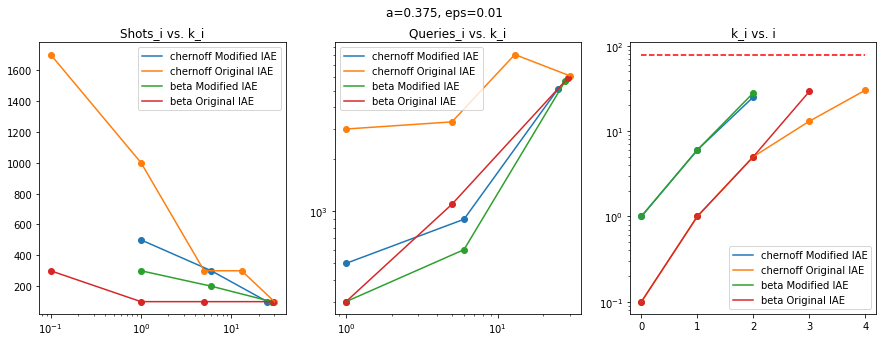

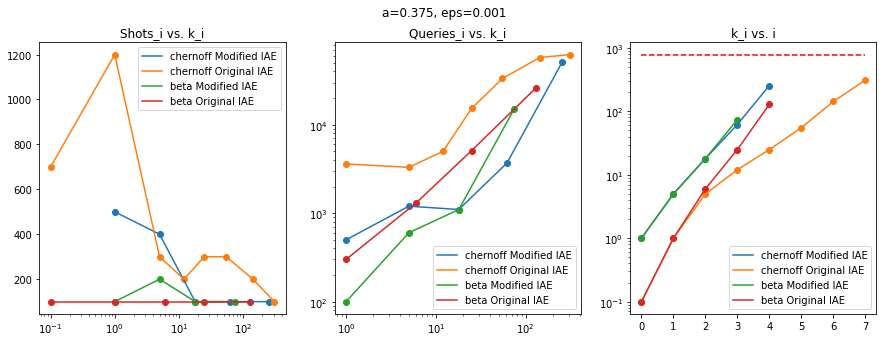

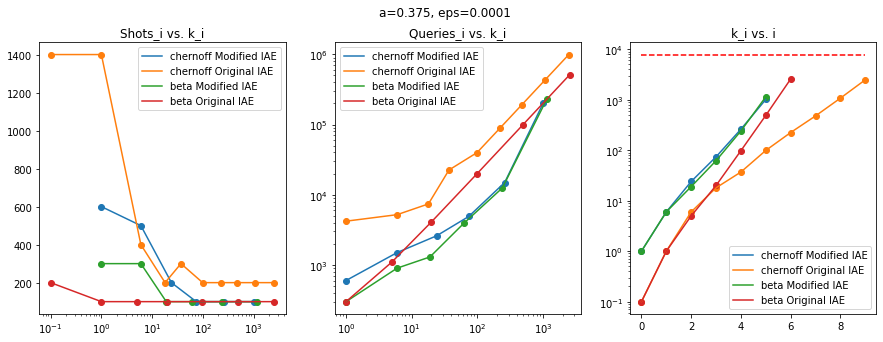

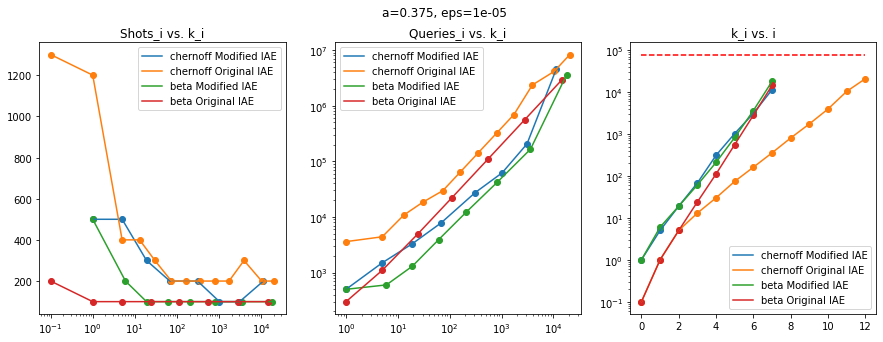

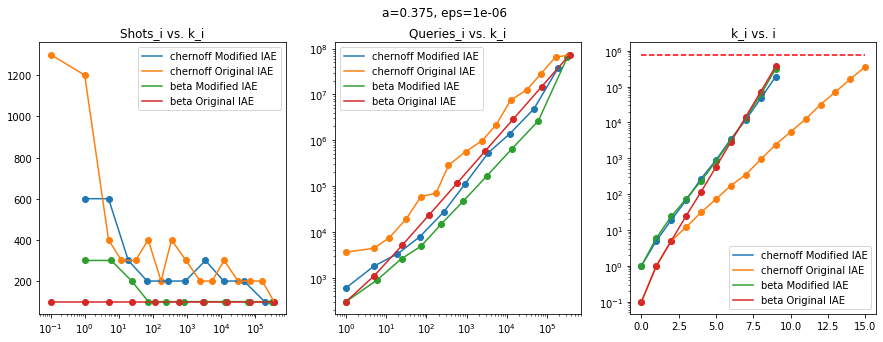

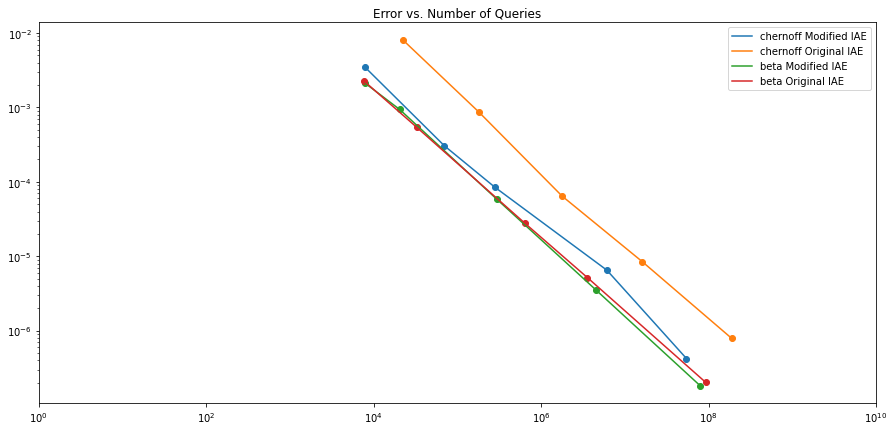

a: 7/16 = 0.4375
Modified IAE estimations: [0.4342457174202119, 0.4373719670403392, 0.43748947810448285, 0.4374999270567522, 0.4375000020946074]
Original IAE estimations: [0.4359863942567005, 0.4374084088832887, 0.4374824568912024, 0.4375008865117619, 0.4375000760011659]
Modified IAE total queries: 88865000
Original IAE total queries: 199556400
Modified IAE epsilons (CI width): [0.006790551921236732, 0.0005591809769030232, 2.2512573174371386e-05, 2.626098207225702e-06, 3.0500578707126635e-07]
Original IAE epsilons (CI width): [0.00980967625794113, 0.0008166505886129383, 7.02364823879087e-05, 9.712221923502407e-06, 8.002612220392447e-07]
a: 7/16 = 0.4375
Modified IAE estimations: [0.43606446949109057, 0.43761553092816863, 0.4374992988846459, 0.4375002068864813, 0.43749993857485636]
Original IAE estimations: [0.437500775354709, 0.43756754756279514, 0.43752351691289965, 0.43750175043683315, 0.43749997754085]
Modified IAE total queries: 48394500
Original IAE total queries: 42174800
Modifie

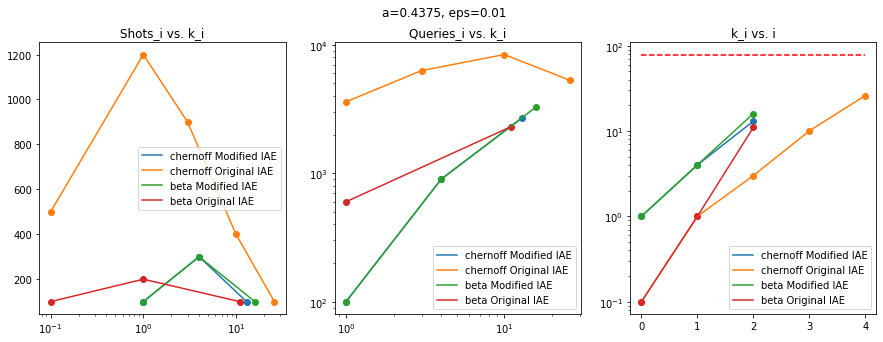

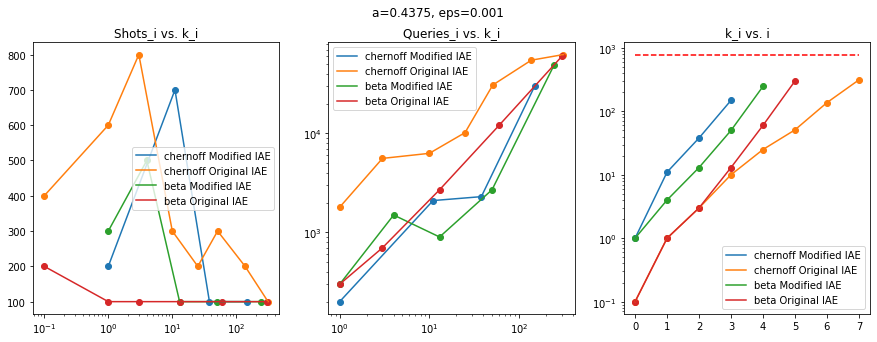

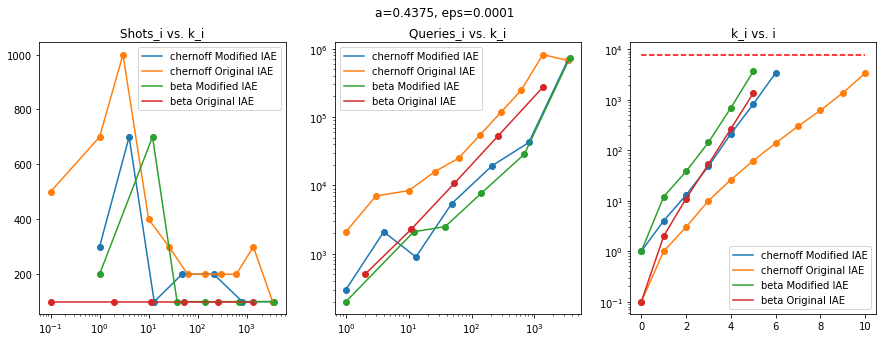

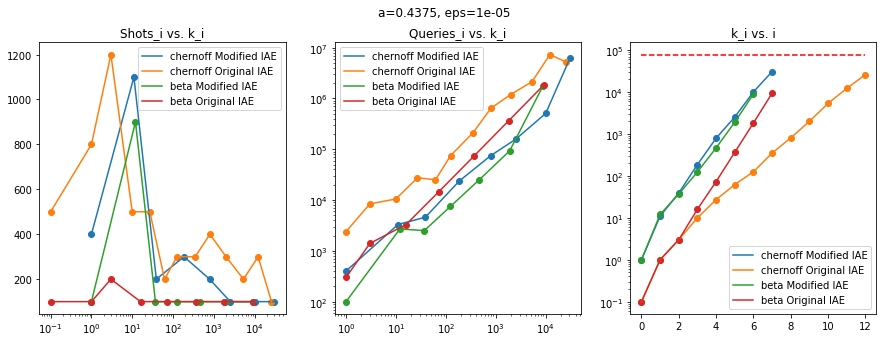

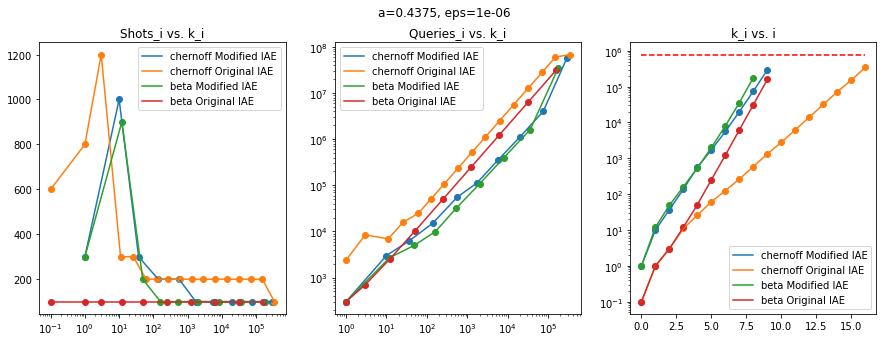

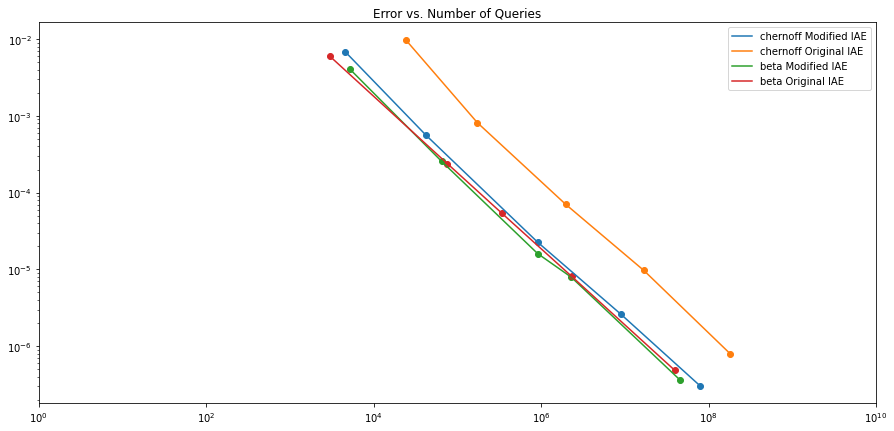

a: 8/16 = 0.5
Modified IAE estimations: [0.5002062746746129, 0.4999777399743502, 0.5000209877325241, 0.5000016227737855, 0.500000402538948]
Original IAE estimations: [0.5003322367387562, 0.4999464282163908, 0.4999907749291138, 0.49999999999999994, 0.4999999467340084]
Modified IAE total queries: 36393500
Original IAE total queries: 247033700
Modified IAE epsilons (CI width): [0.00309374449826616, 0.0003362676278798049, 8.546888584740064e-05, 5.0871711350097826e-06, 8.218607373822184e-07]
Original IAE epsilons (CI width): [0.008387839626620097, 0.0006894073584061966, 9.61943518199837e-05, 7.615890714129936e-06, 5.656479866722464e-07]
a: 8/16 = 0.5
Modified IAE estimations: [0.49999999999999994, 0.500021687668326, 0.4999912571546894, 0.4999999999999999, 0.500000062688166]
Original IAE estimations: [0.4989680248742078, 0.4998005817644008, 0.5000037756458452, 0.5000004550014131, 0.49999982047198066]
Modified IAE total queries: 25401500
Original IAE total queries: 37270700
Modified IAE epsil

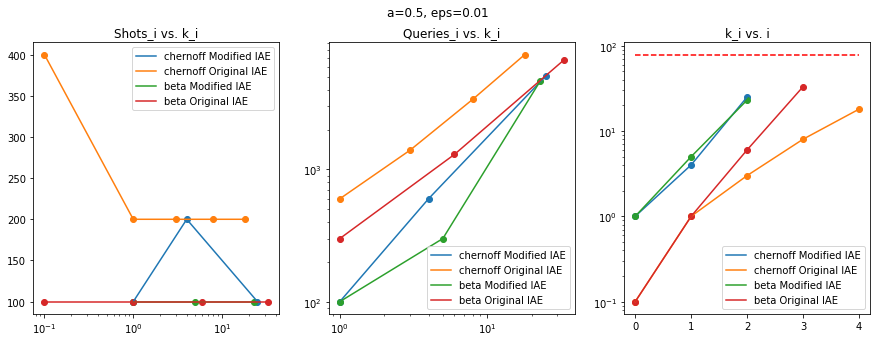

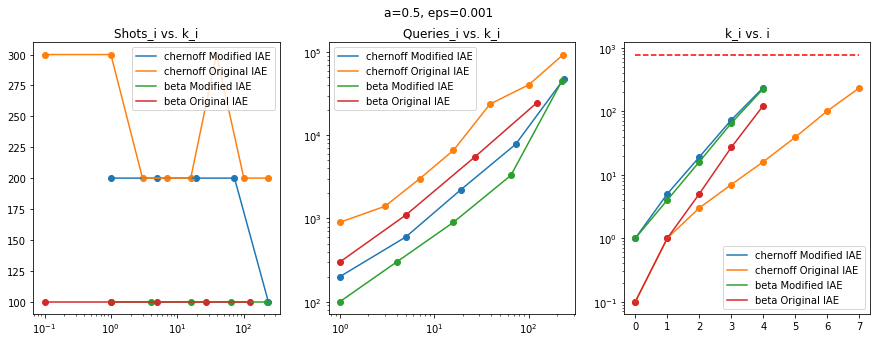

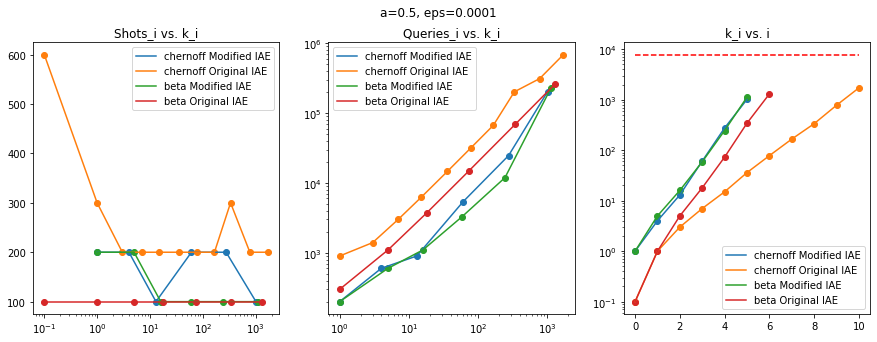

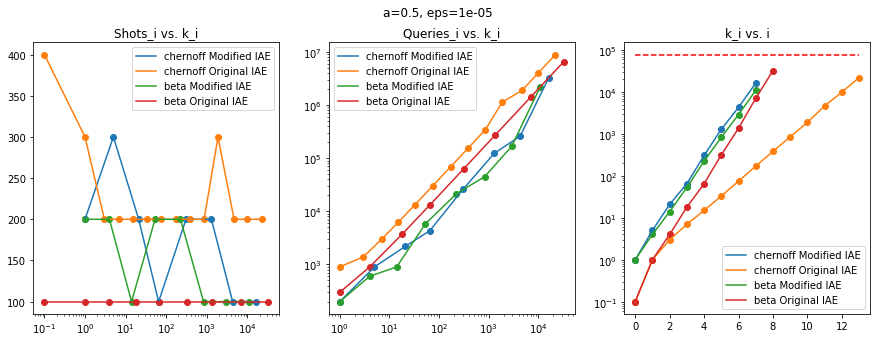

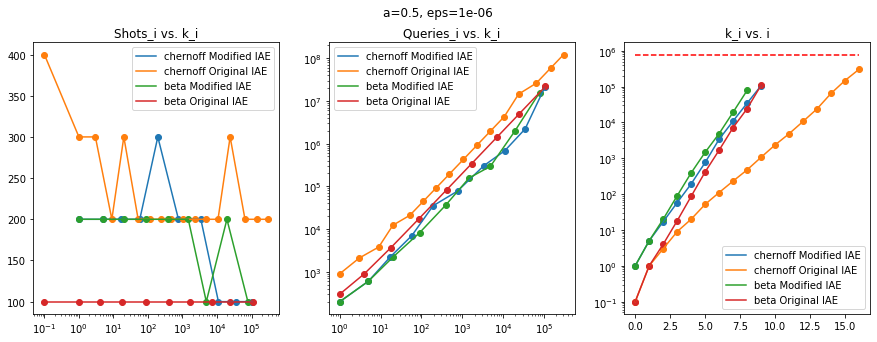

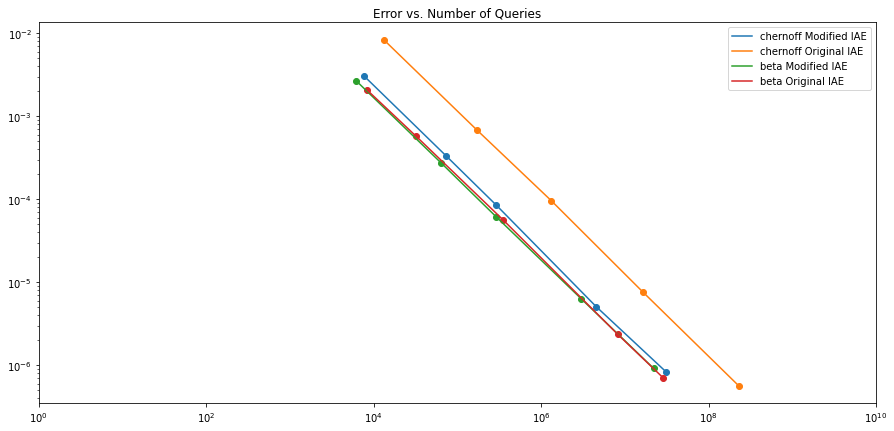

a: 9/16 = 0.5625
Modified IAE estimations: [0.5596029401977879, 0.5624715216589848, 0.5624974579035186, 0.5624995455419297, 0.5625000923598713]
Original IAE estimations: [0.5617755100369818, 0.5625351667190598, 0.5624937722812432, 0.5622911362134146, 0.5625001383152568]
Modified IAE total queries: 32693300
Original IAE total queries: 253382200
Modified IAE epsilons (CI width): [0.006209344537233652, 0.0006360042610671912, 4.074601733439209e-05, 9.643714017959493e-06, 8.242128060609311e-07]
Original IAE epsilons (CI width): [0.00940069302033153, 0.0005951804017076956, 5.8003230865799615e-05, 8.36202541310005e-06, 6.807775306261199e-07]
a: 9/16 = 0.5625
Modified IAE estimations: [0.5651271973179728, 0.5626523381323929, 0.562499268975684, 0.5625031796282081, 0.5624999024961224]
Original IAE estimations: [0.561293390771668, 0.5624837143337893, 0.5624794823501705, 0.5624997987544329, 0.5624997883033855]
Modified IAE total queries: 32192800
Original IAE total queries: 57058100
Modified IAE e

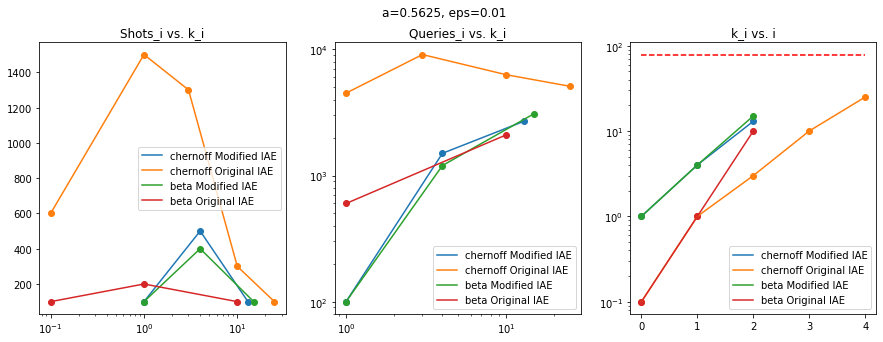

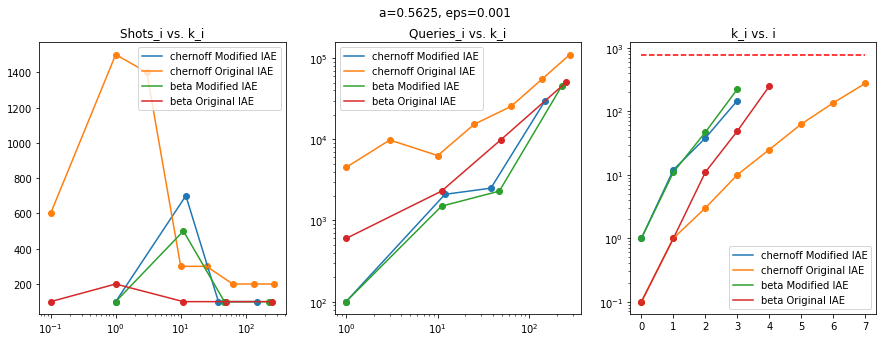

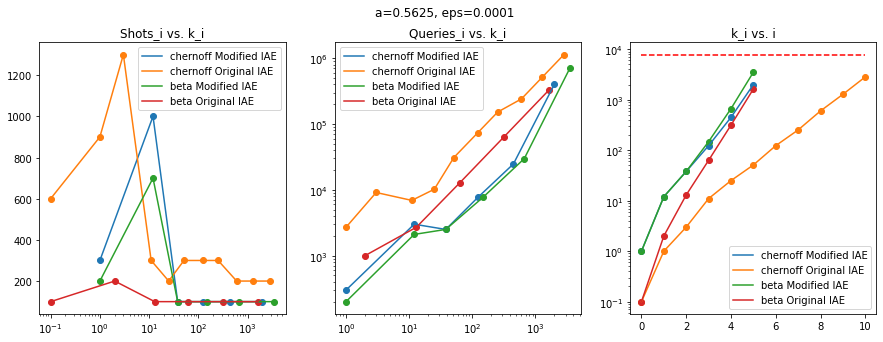

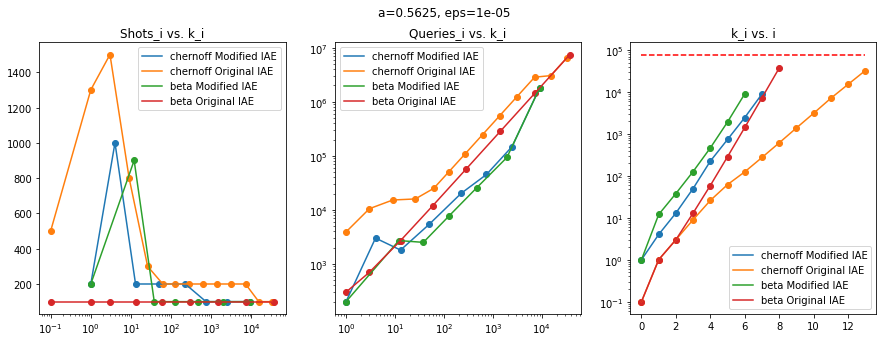

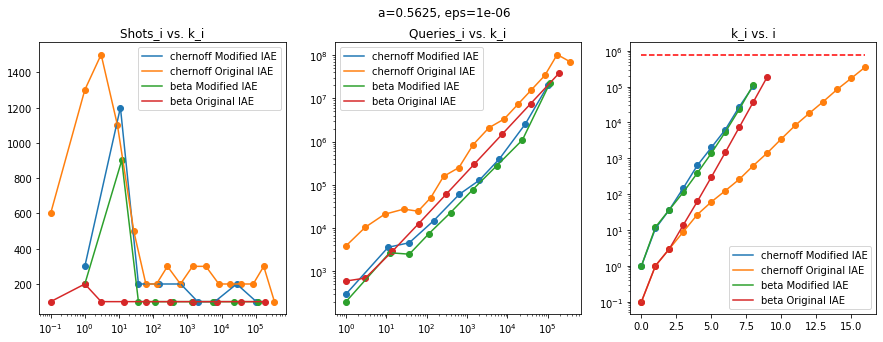

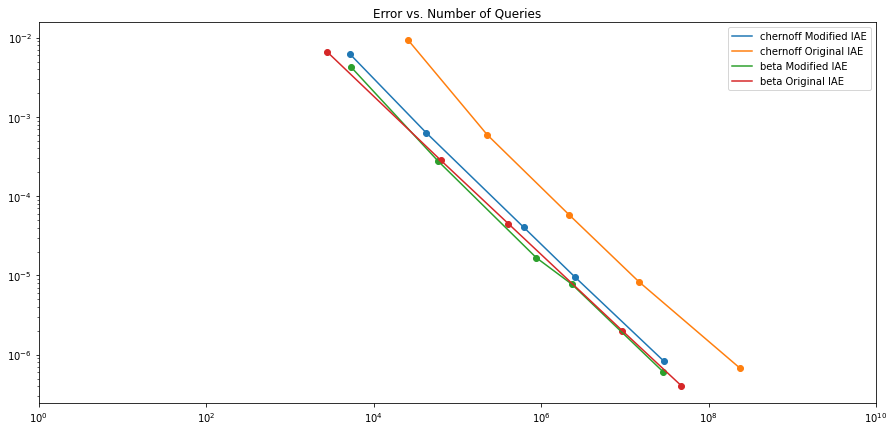

a: 10/16 = 0.625
Modified IAE estimations: [0.6217371891808332, 0.6248221251457766, 0.6249859986213179, 0.6249987699761665, 0.6249999615901437]
Original IAE estimations: [0.6226430931940543, 0.6248292918030935, 0.6240048995396345, 0.6250011660687204, 0.625000036652706]
Modified IAE total queries: 40790300
Original IAE total queries: 229878000
Modified IAE epsilons (CI width): [0.005827114047069093, 0.0004053568712518163, 7.742650770670156e-05, 8.320893174429411e-06, 8.338398420626447e-07]
Original IAE epsilons (CI width): [0.007799222128156702, 0.0008371136140214452, 5.589296299246538e-05, 9.11979951945252e-06, 5.615308781847794e-07]
a: 10/16 = 0.625
Modified IAE estimations: [0.624421428708742, 0.624777098229782, 0.6249825212111018, 0.6250007575589802, 0.6250000209566564]
Original IAE estimations: [0.6246260702232262, 0.624973046652805, 0.6249928322736775, 0.624998900078847, 0.6250000019463271]
Modified IAE total queries: 99906700
Original IAE total queries: 72312600
Modified IAE epsi

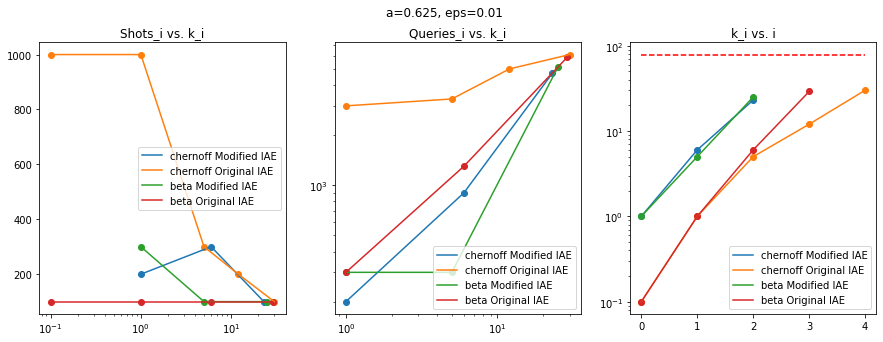

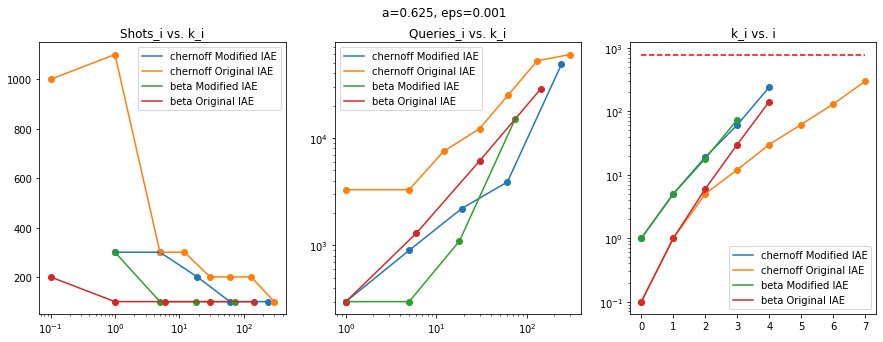

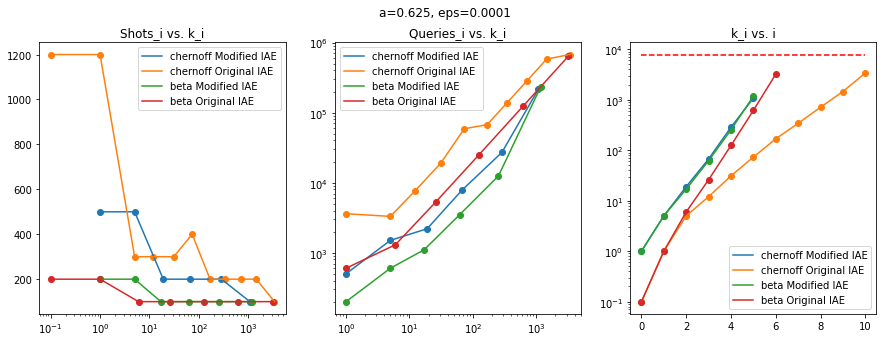

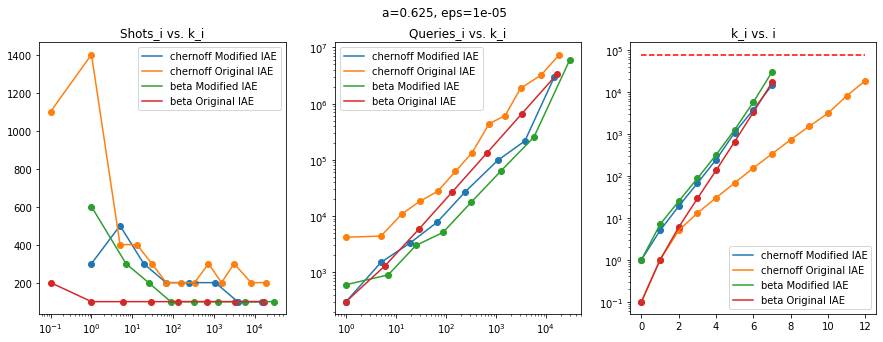

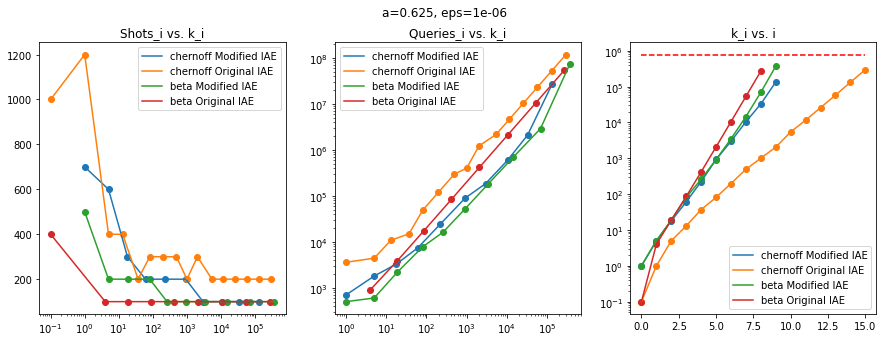

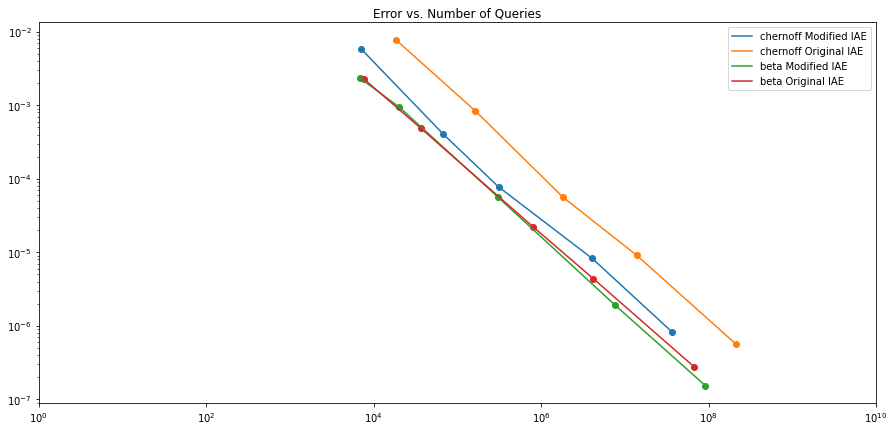

a: 11/16 = 0.6875
Modified IAE estimations: [0.6892531623778744, 0.6874462020651353, 0.6875020292149692, 0.6875001319583809, 0.687500103550736]
Original IAE estimations: [0.686748097807959, 0.6876626440864126, 0.687495577498344, 0.6866018303734802, 0.687239288296022]
Modified IAE total queries: 60175587
Original IAE total queries: 156863500
Modified IAE epsilons (CI width): [0.0065404264121706746, 0.00048208095251345284, 7.684069068519817e-05, 8.232365250437912e-06, 3.6026079824891255e-07]
Original IAE epsilons (CI width): [0.007019819469145261, 0.0007119423872893882, 7.984723693937879e-05, 8.277921325294813e-06, 7.36007025881058e-07]
a: 11/16 = 0.6875
Modified IAE estimations: [0.6869048863421914, 0.6877261426011241, 0.6874765187280243, 0.6875013858754757, 0.6875001222277943]
Original IAE estimations: [0.6877635202382467, 0.6875598775245712, 0.687487525115335, 0.6875014598686995, 0.6875000021049029]
Modified IAE total queries: 50665000
Original IAE total queries: 84469900
Modified IAE

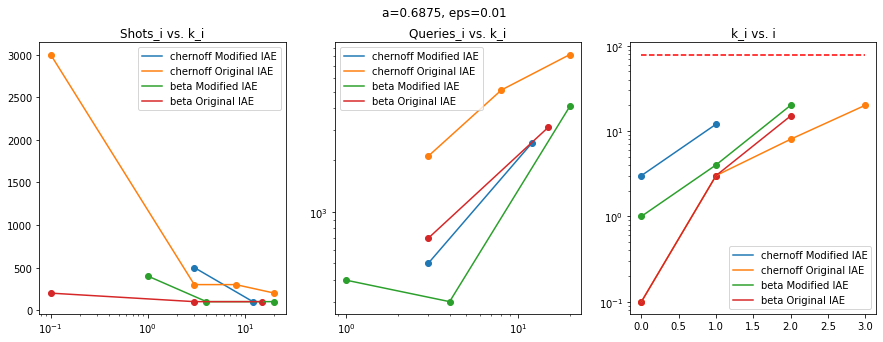

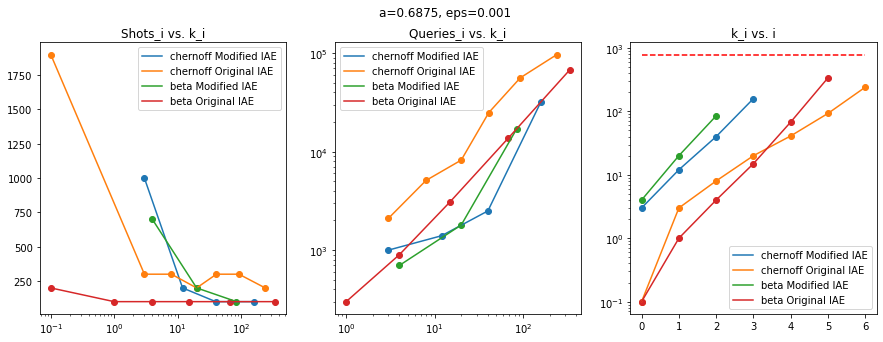

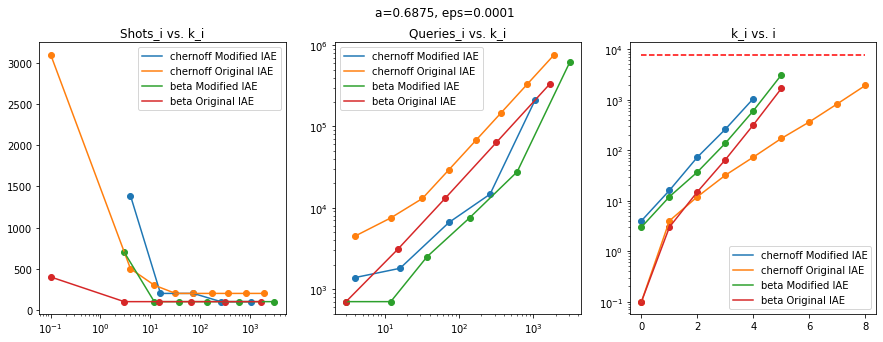

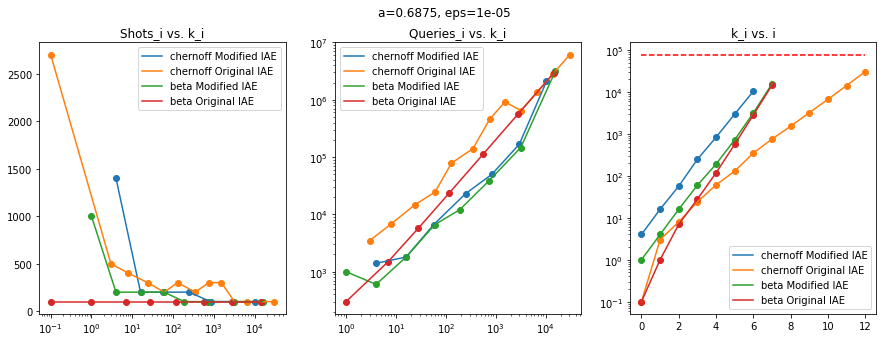

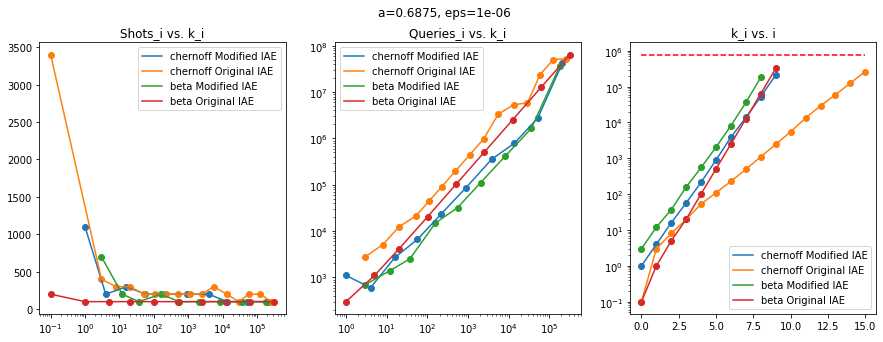

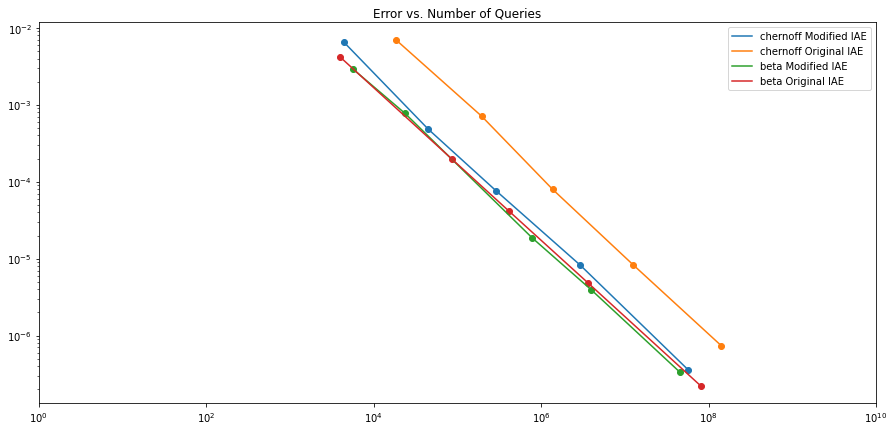

a: 12/16 = 0.75
Modified IAE estimations: [0.7508726194794098, 0.7500220072513084, 0.750004985050589, 0.74999992954937, 0.7499999201949228]
Original IAE estimations: [0.7488994221919663, 0.7501833941217508, 0.7500148763048892, 0.7499980945755085, 0.7500001782562592]
Modified IAE total queries: 82015600
Original IAE total queries: 268297600
Modified IAE epsilons (CI width): [0.007051169232781762, 0.00020398893536105467, 7.825891856488854e-05, 4.23311245539848e-06, 3.4174872320935634e-07]
Original IAE epsilons (CI width): [0.007649393083374145, 0.0007421290090197097, 7.41174013880741e-05, 8.128716694255633e-06, 8.047405430922083e-07]
a: 12/16 = 0.75
Modified IAE estimations: [0.7506283149818337, 0.7499421617267367, 0.7500063446694585, 0.74999961046546, 0.749999847310479]
Original IAE estimations: [0.7483958120950834, 0.7499101584567281, 0.7500017475196368, 0.7499994273703074, 0.7500003412671536]
Modified IAE total queries: 33809500
Original IAE total queries: 30374900
Modified IAE epsilo

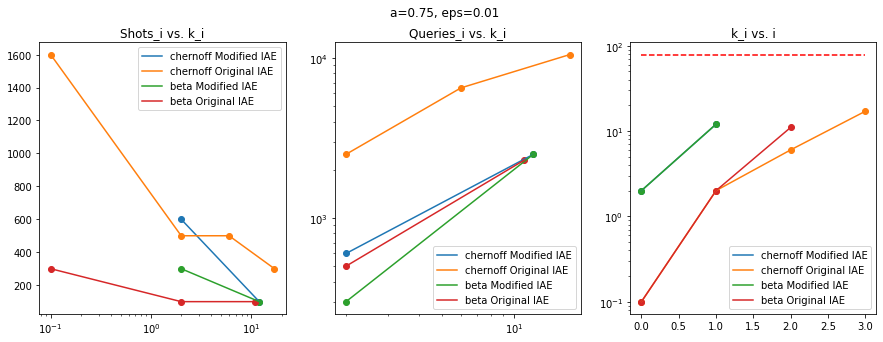

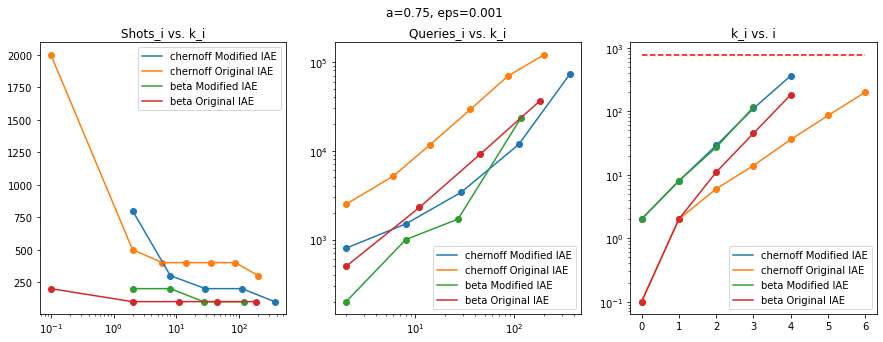

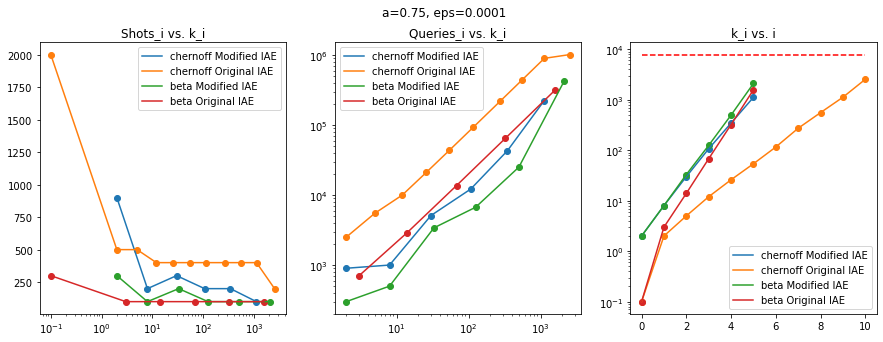

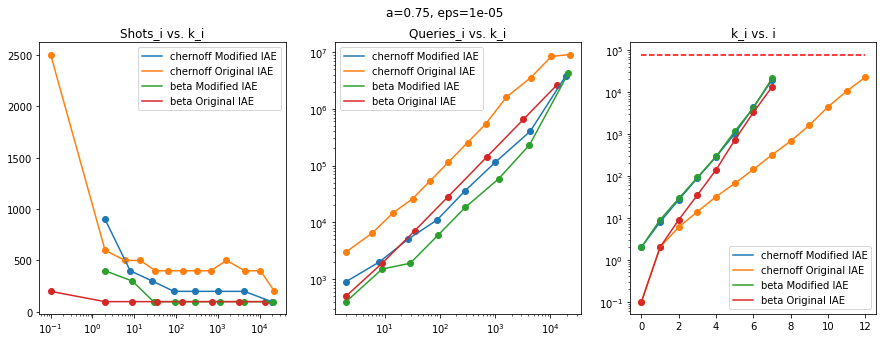

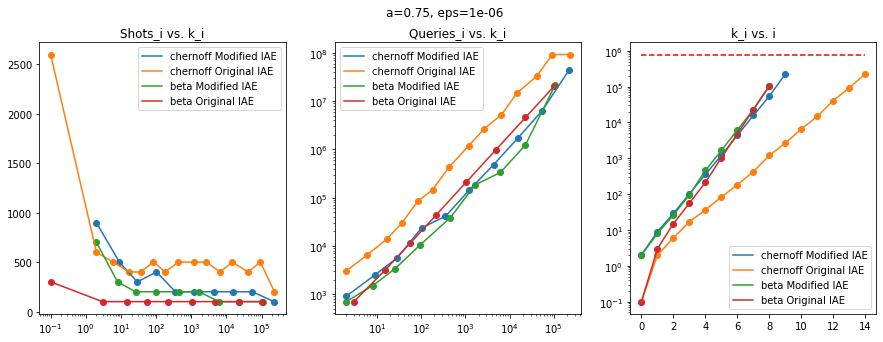

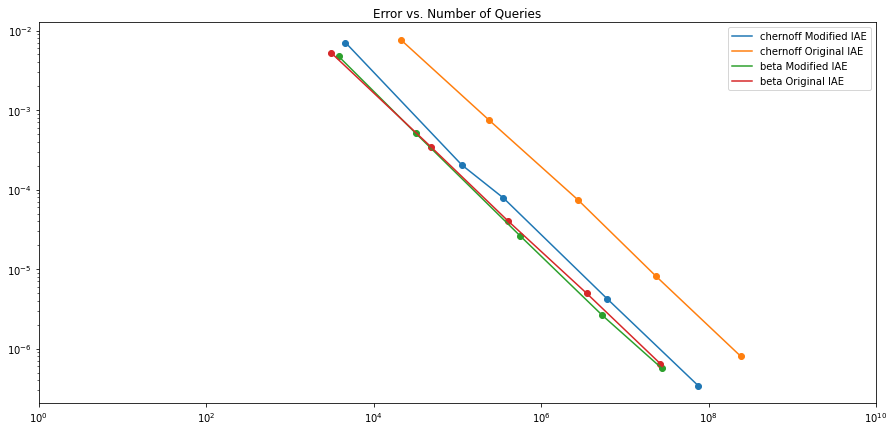

a: 13/16 = 0.8125
Modified IAE estimations: [0.8113420930879687, 0.8125895854708178, 0.8124881391581493, 0.8124995565853652, 0.8125000518695238]
Original IAE estimations: [0.8106708346538438, 0.8124180806238548, 0.8125096820533886, 0.8125012356451291, 0.8124999405176191]
Modified IAE total queries: 38649900
Original IAE total queries: 216878000
Modified IAE epsilons (CI width): [0.006455311035033551, 0.0004023281365296283, 4.7410831893246463e-05, 2.6815041633265757e-06, 6.458085900495902e-07]
Original IAE epsilons (CI width): [0.0075581291705250075, 0.0004518658046419599, 5.44937103970633e-05, 6.227680951764736e-06, 6.484531706041352e-07]
a: 13/16 = 0.8125
Modified IAE estimations: [0.8146577287720558, 0.8125012744951043, 0.8125005949053912, 0.8124996090074095, 0.8124999582630328]
Original IAE estimations: [0.8111629235123823, 0.8125809842716982, 0.8124994558706129, 0.812500286421989, 0.812499931043994]
Modified IAE total queries: 30867400
Original IAE total queries: 40281600
Modified 

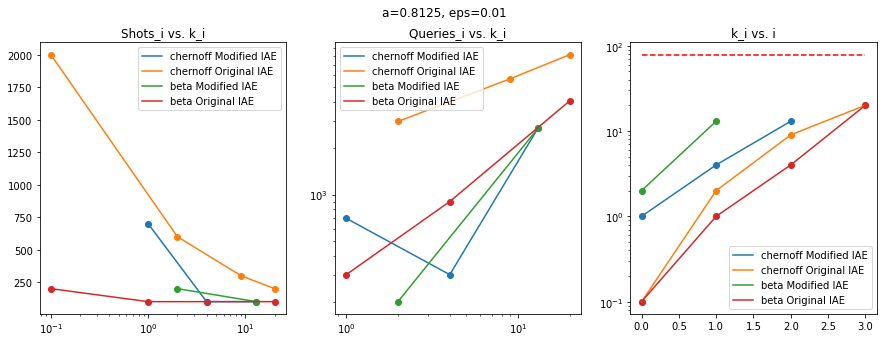

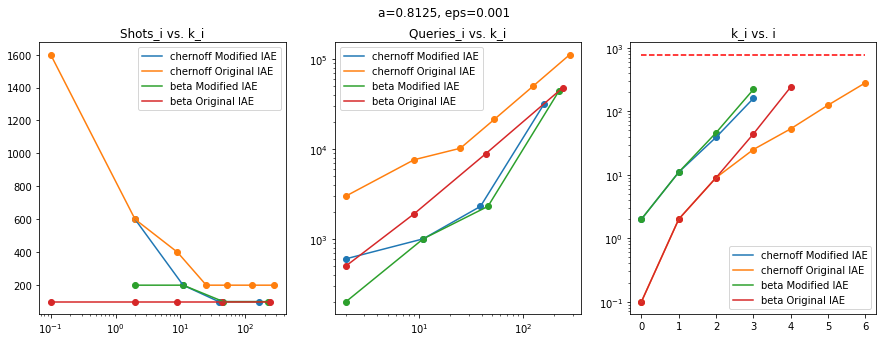

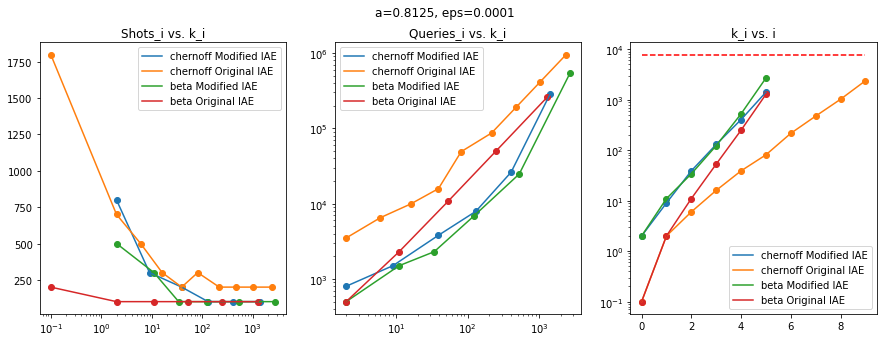

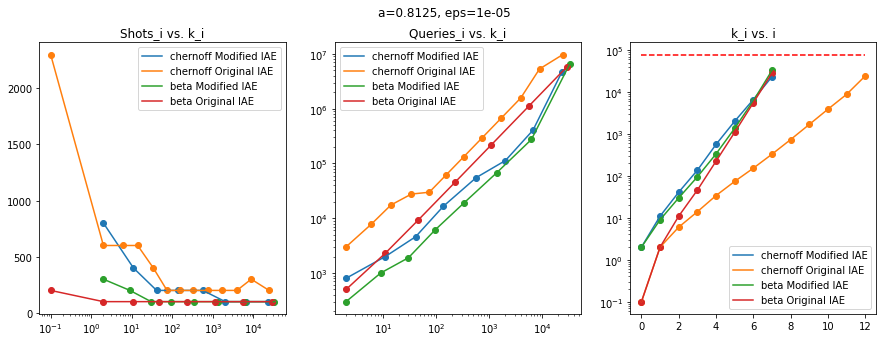

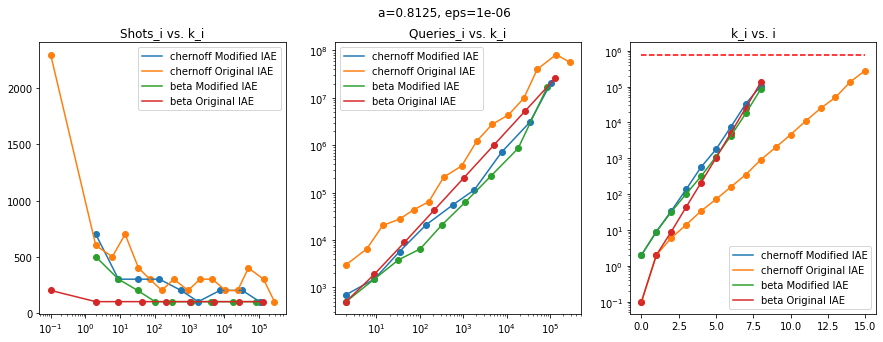

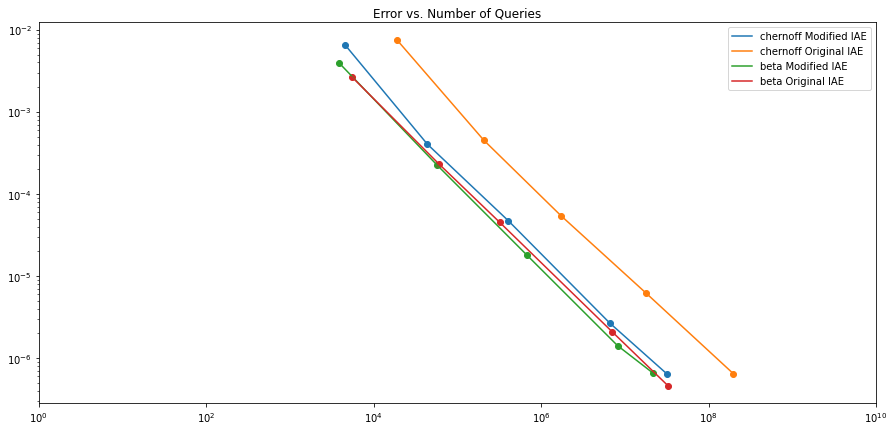

a: 14/16 = 0.875
Modified IAE estimations: [0.8739496837033397, 0.8750863509036617, 0.87500476714652, 0.875001923591731, 0.8750000111793477]
Original IAE estimations: [0.8745114117577469, 0.8751149741811557, 0.8749909484944006, 0.8750010860200839, 0.8750000065283314]
Modified IAE total queries: 66986600
Original IAE total queries: 231504100
Modified IAE epsilons (CI width): [0.0026228621013745235, 0.0004045522034234472, 2.0974641474713618e-05, 4.5942963362022304e-06, 3.453391083096946e-07]
Original IAE epsilons (CI width): [0.005578297352014205, 0.0005245724755160719, 5.3064600267993534e-05, 4.879722509065765e-06, 3.978758140177341e-07]
a: 14/16 = 0.875
Modified IAE estimations: [0.875005929069506, 0.8749775425735811, 0.8750061779475341, 0.875000420539169, 0.8750001242670947]
Original IAE estimations: [0.8745598175760441, 0.8749300308761971, 0.8750073776336926, 0.8749979275631785, 0.8750002033221989]
Modified IAE total queries: 83940200
Original IAE total queries: 26368100
Modified IAE

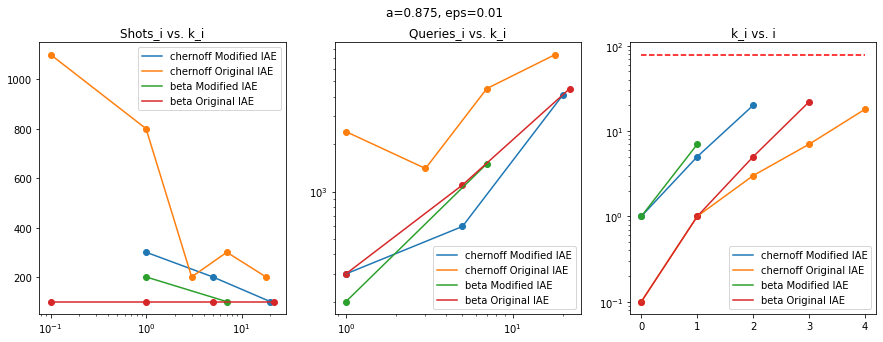

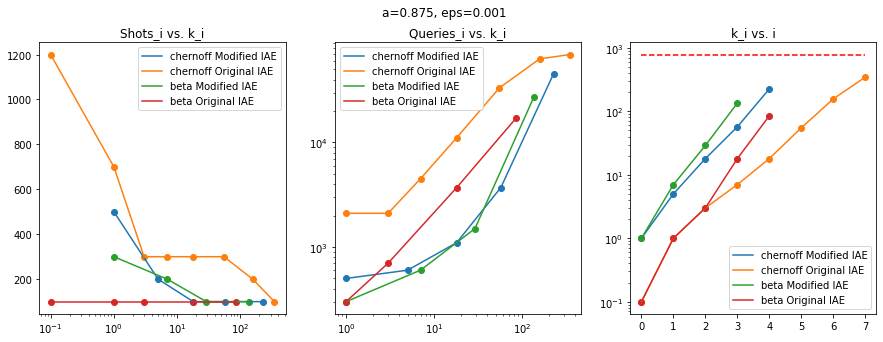

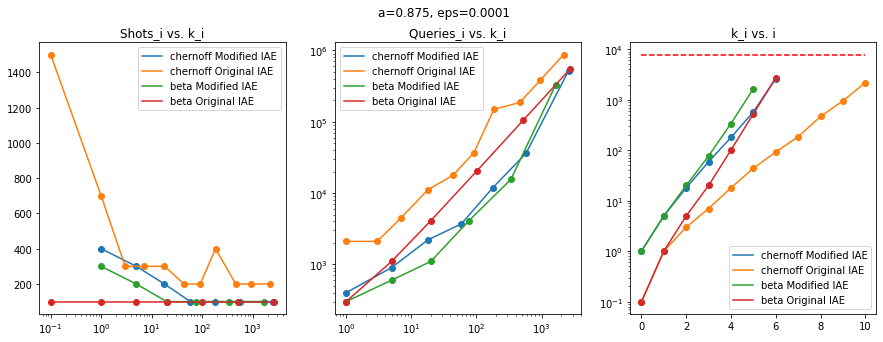

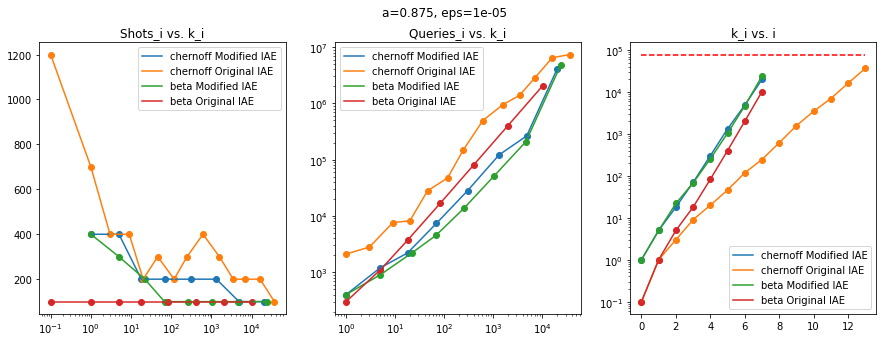

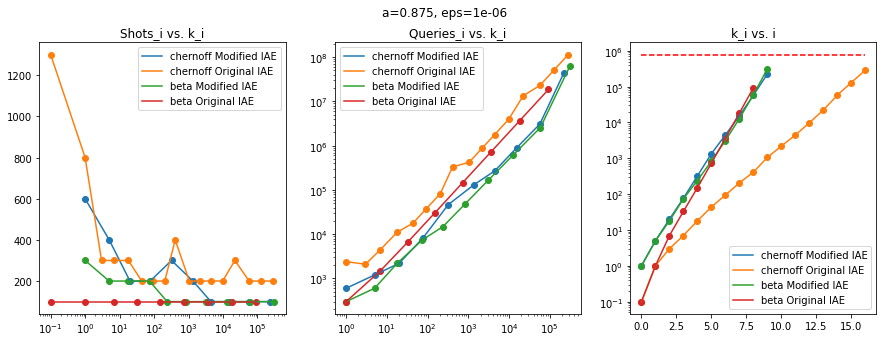

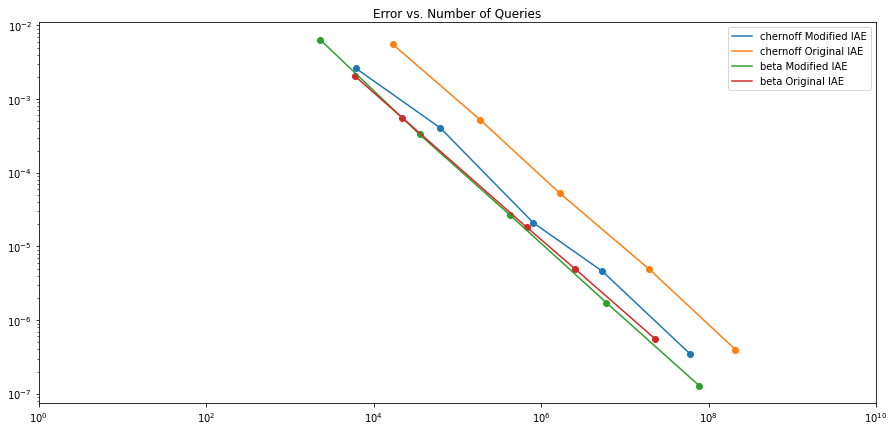

a: 15/16 = 0.9375
Modified IAE estimations: [0.9364988099978595, 0.9375185922959623, 0.9374987050920578, 0.9374999160301296, 0.9374998766346729]
Original IAE estimations: [0.9371782809524247, 0.9374998816384952, 0.9375058856123933, 0.937500126299793, 0.9374999694668107]
Modified IAE total queries: 56715900
Original IAE total queries: 241140700
Modified IAE epsilons (CI width): [0.003519817102973166, 0.0001477646088309803, 1.481934233904525e-05, 1.6230538291694963e-06, 4.3984263553564773e-07]
Original IAE epsilons (CI width): [0.003972216310245302, 0.00031270986865433725, 3.7922971743098444e-05, 3.573943634371801e-06, 4.01875139111052e-07]
a: 15/16 = 0.9375
Modified IAE estimations: [0.9388512557862607, 0.937540113890339, 0.937501486936235, 0.9374997121860861, 0.937499997624565]
Original IAE estimations: [0.9379528217823492, 0.9373927092218104, 0.9374954509542597, 0.9375012608952987, 0.937499815869518]
Modified IAE total queries: 42174400
Original IAE total queries: 24312100
Modified IA

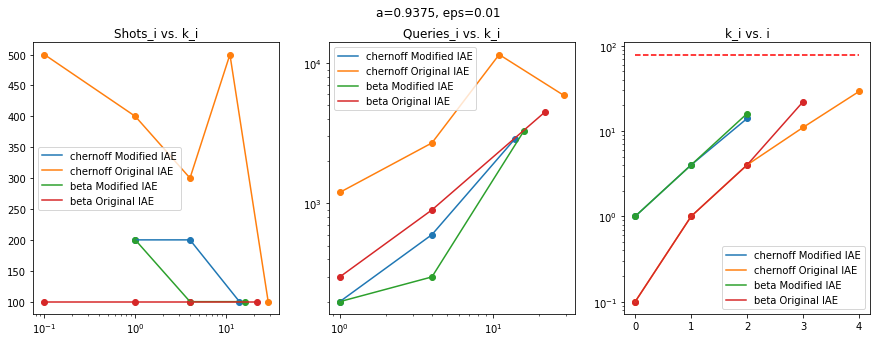

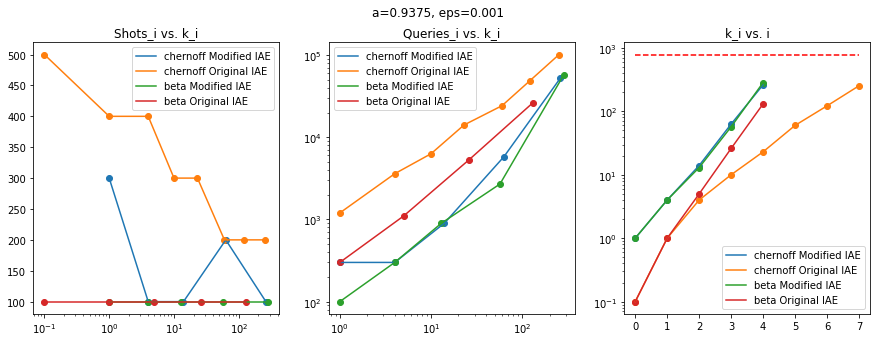

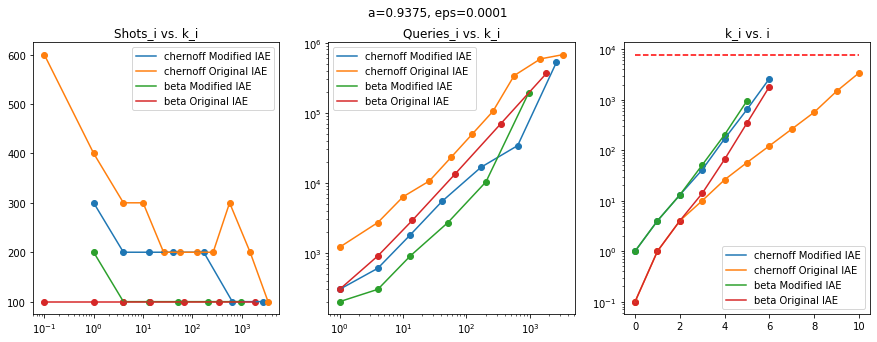

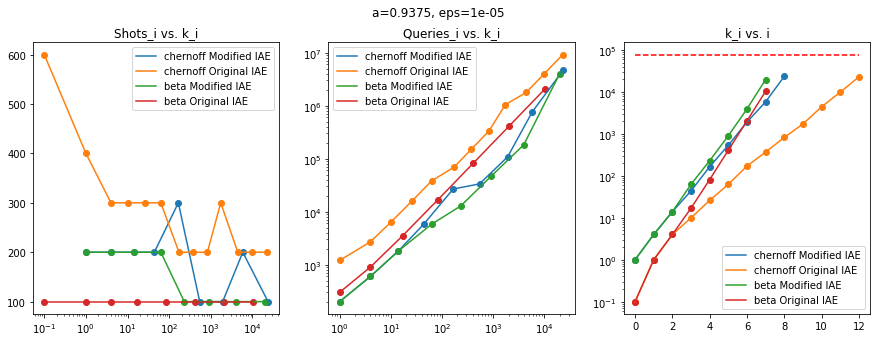

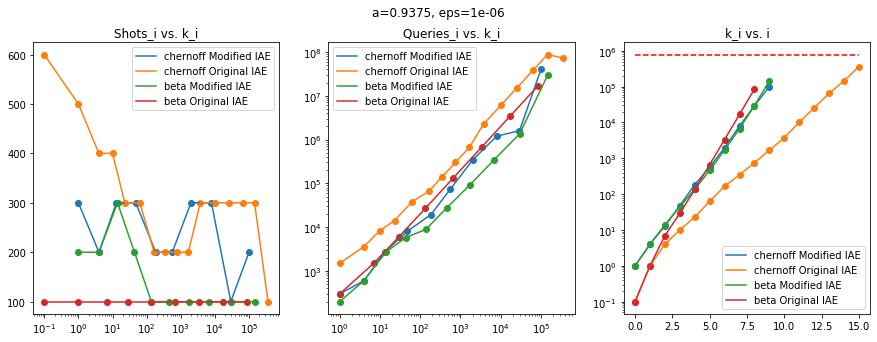

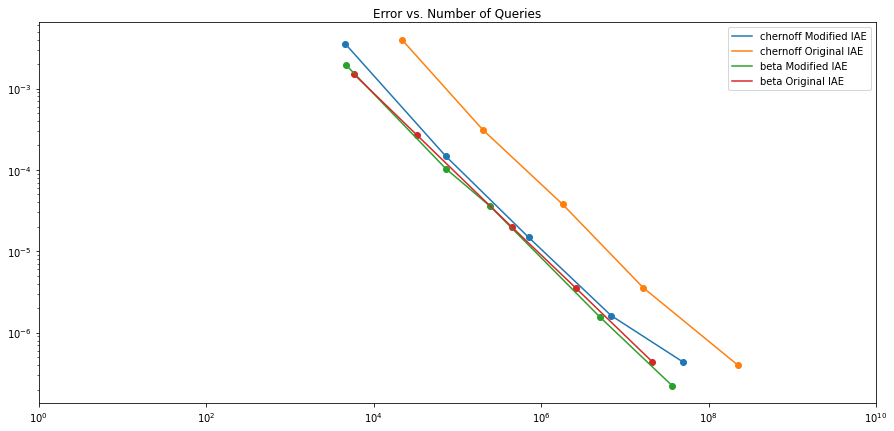

a: 16/16 = 1.0
Modified IAE estimations: [0.9999101612564328, 0.9999993242307761, 0.9999999926594605, 0.9999999999387643, 0.9999999999995622]
Original IAE estimations: [0.9999545409141066, 0.9999980052714579, 0.9999999950764749, 0.9999999999376453, 0.9999999999994088]
Modified IAE total queries: 66463100
Original IAE total queries: 139982800
Modified IAE epsilons (CI width): [8.983874356716104e-05, 6.757692238568147e-07, 7.340539509570476e-09, 6.123568319083006e-11, 4.377609386096992e-13]
Original IAE epsilons (CI width): [4.545908589337344e-05, 1.9947285420651717e-06, 4.923525143141205e-09, 6.235467697734975e-11, 5.911937606128959e-13]
a: 16/16 = 1.0
Modified IAE estimations: [0.9999683104265411, 0.9999999019552268, 0.9999999912325528, 0.9999999999781215, 0.9999999999999498]
Original IAE estimations: [0.9999743710958622, 0.9999992510452191, 0.9999999994875743, 0.9999999999819352, 0.9999999999994558]
Modified IAE total queries: 84566600
Original IAE total queries: 35460200
Modified IAE

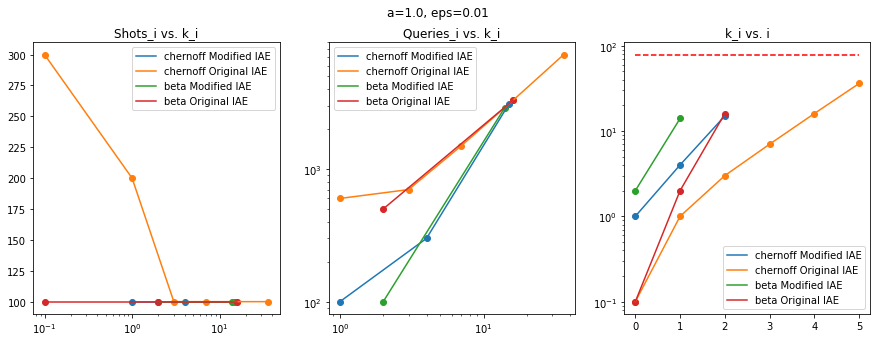

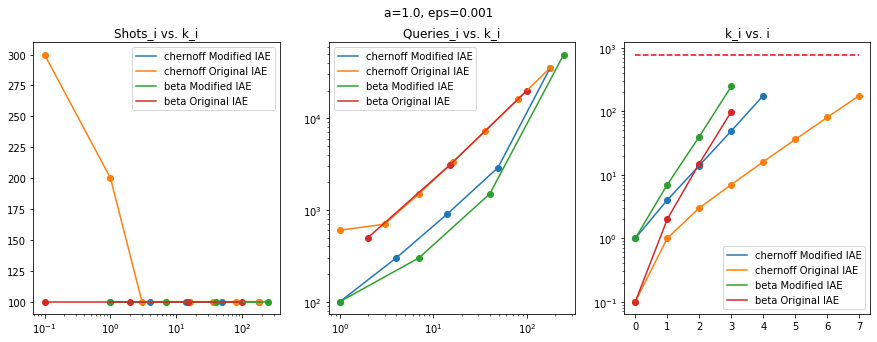

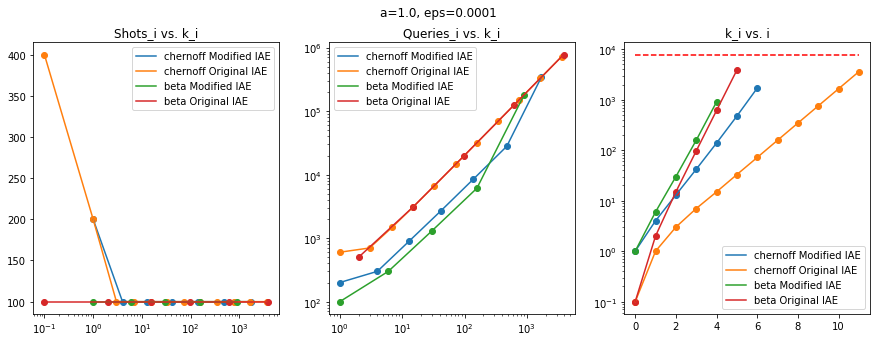

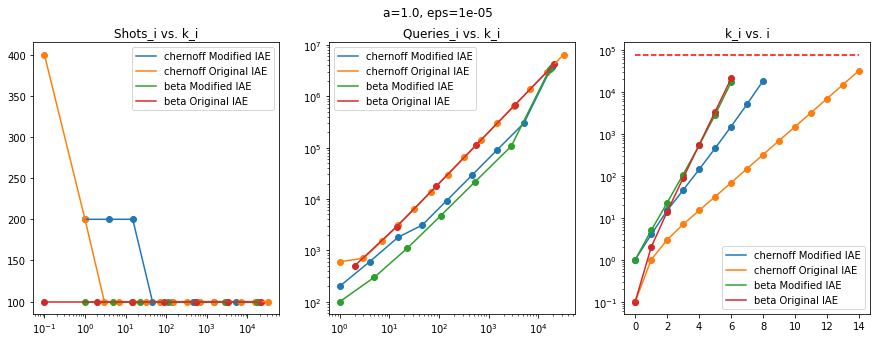

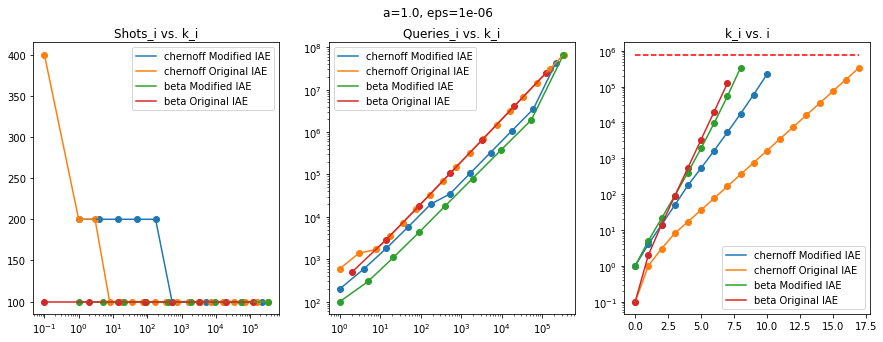

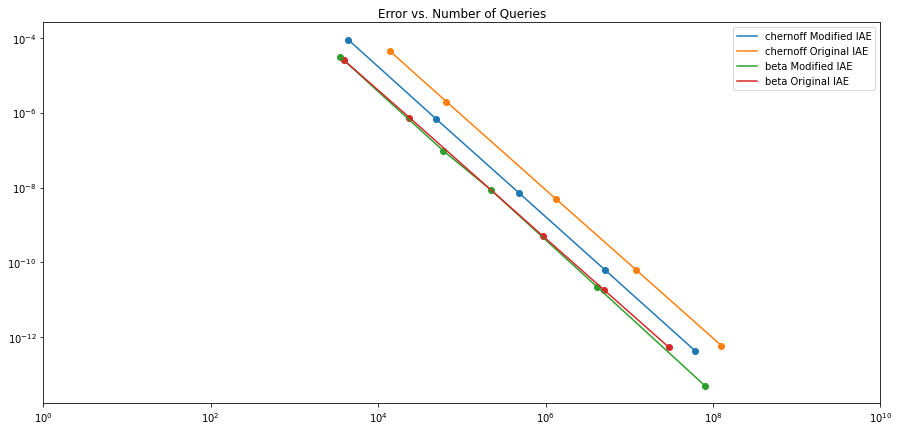

In [7]:
# stats recording
iae_epsilon = []
iae_nshots = []
miae_epsilon = []
miae_nshots = []

exprs = ['Modified IAE', 'Original IAE']

wins = matches = 0

tdelta = 0

ki = 0
while ki <= k:
    
    # setup problems with specified N,k
    N = 2**n
    marked = sample(range(N), ki)
    problem, problem2 = make_problems(n, marked)
    
    # execute experiments for each power
    miae_results = defaultdict(list)
    iae_results = defaultdict(list)
    
    for i, epsilon in enumerate(epsilons):
        fig,axs = plt.subplots(1,3,figsize=(15,5))
        
        fig.suptitle(f'a={ki/N}, eps={epsilon}')
        axs[0].set_xscale('log')
        axs[0].set_title('Shots_i vs. k_i')
            
        axs[1].set_xscale('log')
        axs[1].set_yscale('log')
        axs[1].set_title('Queries_i vs. k_i')

        axs[2].set_yscale('log')
        axs[2].set_title('k_i vs. i')
        
        n_entries = 0
        for confint_method in ['chernoff', 'beta']:
                               
            if verbose:
                print('ε:',epsilon)

            MIAE = ModifiedIterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                        alpha=alpha, 
                                                        confint_method=confint_method, 
                                                        quantum_instance=aer_sim)

            IAE = IterativeAmplitudeEstimation(epsilon_target=epsilon, 
                                                        alpha=alpha, 
                                                        confint_method=confint_method, 
                                                        quantum_instance=aer_sim)

            # configure the number of shots this way and pray that it works
            MIAE._quantum_instance._run_config.shots = shots
            IAE._quantum_instance._run_config.shots = shots

            # for recording intermediate algo results
            state = defaultdict(dict)
            state2 = defaultdict(dict)

            miae_result = MIAE.estimate(problem,
                                        state=state,
                                        verbose=verbose)

            iae_result = IAE.estimate(problem2,
                                      state=state2,
                                      verbose=verbose)

            miae_results[confint_method].append(miae_result)
            iae_results[confint_method].append(iae_result)
            
            if verbose:
                print()
        
            mod_shots, mod_queries, mod_k = process_state(state)
            base_shots, base_queries, base_k = process_state(state2)

             # plots for shots vs k
            axs[0].plot(mod_k, mod_shots)
            axs[0].scatter(mod_k, mod_shots)
            axs[0].plot(base_k, base_shots)
            axs[0].scatter(base_k, base_shots)

            # plots for nqueries vs k
            axs[1].plot(mod_k, mod_queries)
            axs[1].scatter(mod_k, mod_queries)
            axs[1].plot(base_k[1:], base_queries)
            axs[1].scatter(base_k[1:], base_queries)

            # plots for k

            axs[2].plot(mod_k)
            axs[2].scatter(range(len(mod_k)), mod_k)
            axs[2].plot(base_k)
            axs[2].scatter(range(len(base_k)), base_k)


            n_entries = max(len(base_k), len(mod_k), n_entries)
        
        for i in range(3):
            axs[i].legend([f'{c} {e}' for c in ['chernoff', 'beta'] for e in exprs])
        
        axs[2].plot(range(n_entries), np.repeat(np.pi / 4 / epsilon, n_entries), c='r', linestyle='--')
            
    # process results
    plt.figure(figsize=(15,7))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(1, 10**10)
    plt.title('Error vs. Number of Queries')
    
    for confint_method in ['chernoff', 'beta']:
        miae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in miae_results[confint_method]]
        miae_nshots_i  = [res.num_oracle_queries for res in miae_results[confint_method]]

        iae_epsilon_i = [(res.confidence_interval_processed[1] - res.confidence_interval_processed[0]) / 2 for res in iae_results[confint_method]]
        iae_nshots_i  = [res.num_oracle_queries for res in iae_results[confint_method]]

        print(f'a: {ki}/{N} = {ki/N}')
        print(f'{exprs[0]} estimations:', [res.estimation for res in miae_results[confint_method]])
        print(f'{exprs[1]} estimations:', [res.estimation for res in iae_results[confint_method]])

        miae_total_queries, iae_total_queries = sum(miae_nshots_i), sum(iae_nshots_i)
        print(f'{exprs[0]} total queries:', miae_total_queries)
        print(f'{exprs[1]} total queries:', iae_total_queries)

        print(f'{exprs[0]} epsilons (CI width):', miae_epsilon_i)
        print(f'{exprs[1]} epsilons (CI width):', iae_epsilon_i)

        diff = round(abs(iae_total_queries - miae_total_queries) / miae_total_queries * 100, 2)
    #     print('Modified version wins?', iae_total_queries < miae_total_queries, f'with {diff}% difference')

        wins += int(iae_total_queries < miae_total_queries)
        matches += 1


        # plots for query complexity, shots per k
        
        # plot query complexity
        plt.scatter(miae_nshots_i, miae_epsilon_i)
        plt.plot(miae_nshots_i, miae_epsilon_i)
        plt.scatter(iae_nshots_i, iae_epsilon_i)
        plt.plot(iae_nshots_i, iae_epsilon_i)

    plt.legend([f'{c} {e}' for c in ['chernoff', 'beta'] for e in exprs])
    
    plt.show()
    
    # save results for epsilon vs nshots
    miae_nshots.append(miae_nshots_i)
    miae_epsilon.append(miae_epsilon_i)
    iae_nshots.append(iae_nshots_i)
    iae_epsilon.append(iae_epsilon_i)
    
    ki += 1
    
iae_nshots = np.array(iae_nshots)
# print('% modified > 3x modified:', wins/matches)

# 

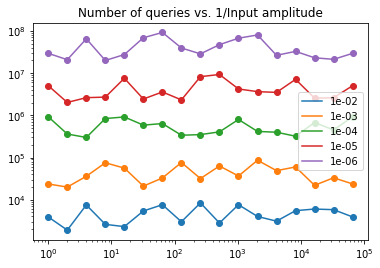

In [8]:
for i in range(len(epsilons)):
    plt.plot(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])
    plt.scatter(2**np.arange(iae_nshots.shape[0]), iae_nshots[:,i])

plt.title('Number of queries vs. 1/Input amplitude')
plt.legend(['{:.0e}'.format(eps) for eps in epsilons])
plt.xscale('log')
plt.yscale('log')

plt.show()